In [408]:
## House Price Predication Case Study

## Importing Necessary Libraries

In [833]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [832]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [831]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Dataset Loading

In [830]:
# Importing housing_data.csv
housing_data = pd.read_csv('housing_data.csv')

In [711]:
# Looking at the first five rows
housing_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [540]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 ## Data Cleaning and Refining and Handle the Missing Values 

In [640]:
pip install klib

Note: you may need to restart the kernel to use updated packages.


In [641]:
 # Using the klib lib to perform cleaning of data
import klib

In [834]:
# Performing cleaning
housing_data = klib.data_cleaning(housing_data)

Shape of cleaned data: (1460, 78) - Remaining NAs: 2737


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 3
     of which 0 single valued.     Columns: []
Dropped missing values: 4228
Reduced memory by at least: 0.73 MB (-81.11%)



In [643]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               1460 non-null   int16   
 1   mssub_class      1460 non-null   int16   
 2   mszoning         1460 non-null   category
 3   lot_frontage     1201 non-null   float32 
 4   lot_area         1460 non-null   int32   
 5   street           1460 non-null   category
 6   lot_shape        1460 non-null   category
 7   land_contour     1460 non-null   category
 8   utilities        1460 non-null   category
 9   lot_config       1460 non-null   category
 10  land_slope       1460 non-null   category
 11  neighborhood     1460 non-null   category
 12  condition1       1460 non-null   category
 13  condition2       1460 non-null   category
 14  bldg_type        1460 non-null   category
 15  house_style      1460 non-null   category
 16  overall_qual     1460 non-null   int8    


In [835]:
# Below code gives list of columns having more than 60% null value
null_percentage = housing_data.isnull().sum()/housing_data.shape[0]*100
col_to_drop = null_percentage[null_percentage>60].keys()

In [836]:
col_to_drop

Index(['fence'], dtype='object')

In [837]:
housing_data = housing_data.drop(col_to_drop, axis=1)

In [647]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               1460 non-null   int16   
 1   mssub_class      1460 non-null   int16   
 2   mszoning         1460 non-null   category
 3   lot_frontage     1201 non-null   float32 
 4   lot_area         1460 non-null   int32   
 5   street           1460 non-null   category
 6   lot_shape        1460 non-null   category
 7   land_contour     1460 non-null   category
 8   utilities        1460 non-null   category
 9   lot_config       1460 non-null   category
 10  land_slope       1460 non-null   category
 11  neighborhood     1460 non-null   category
 12  condition1       1460 non-null   category
 13  condition2       1460 non-null   category
 14  bldg_type        1460 non-null   category
 15  house_style      1460 non-null   category
 16  overall_qual     1460 non-null   int8    


In [648]:
##### Missing Value Check

In [838]:
housing_data.isnull().mean()

id                 0.000000
mssub_class        0.000000
mszoning           0.000000
lot_frontage       0.177397
lot_area           0.000000
street             0.000000
lot_shape          0.000000
land_contour       0.000000
utilities          0.000000
lot_config         0.000000
land_slope         0.000000
neighborhood       0.000000
condition1         0.000000
condition2         0.000000
bldg_type          0.000000
house_style        0.000000
overall_qual       0.000000
overall_cond       0.000000
year_built         0.000000
year_remod_add     0.000000
roof_style         0.000000
roof_matl          0.000000
exterior1st        0.000000
exterior2nd        0.000000
mas_vnr_type       0.005479
mas_vnr_area       0.005479
exter_qual         0.000000
exter_cond         0.000000
foundation         0.000000
bsmt_qual          0.025342
bsmt_cond          0.025342
bsmt_exposure      0.026027
bsmt_fin_type1     0.025342
bsmt_fin_sf1       0.000000
bsmt_fin_type2     0.026027
bsmt_fin_sf2       0

In [839]:
missing_cat_columns = ["mas_vnr_type", "bsmt_qual", "bsmt_cond", "bsmt_exposure", "bsmt_fin_type1", "bsmt_fin_type2","electrical",
                      "fireplace_qu","garage_type", "garage_yr_blt", "garage_finish", "garage_qual", "garage_cond", ]

missing_num_columns = ["lot_frontage", "mas_vnr_area"]

In [842]:
for var in missing_cat_columns:
    housing_data[var] = housing_data[var].fillna(housing_data[var].mode()[0])

In [843]:
for var in missing_num_columns:
    housing_data[var] = housing_data[var].fillna(housing_data[var].mean())

In [721]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               1460 non-null   int16   
 1   mssub_class      1460 non-null   int16   
 2   mszoning         1460 non-null   category
 3   lot_frontage     1460 non-null   float32 
 4   lot_area         1460 non-null   int32   
 5   street           1460 non-null   category
 6   lot_shape        1460 non-null   category
 7   land_contour     1460 non-null   category
 8   utilities        1460 non-null   category
 9   lot_config       1460 non-null   category
 10  land_slope       1460 non-null   category
 11  neighborhood     1460 non-null   category
 12  condition1       1460 non-null   category
 13  condition2       1460 non-null   category
 14  bldg_type        1460 non-null   category
 15  house_style      1460 non-null   category
 16  overall_qual     1460 non-null   int8    


In [844]:
housing_data['misc_val'].value_counts()

## 96.4% value is 0 only so others are outliers . We can drop this column itself

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: misc_val, dtype: int64

In [845]:
housing_data['pool_area'].value_counts()

## 99.5% value is 0 only so others are outliers . We can drop this column itself

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: pool_area, dtype: int64

In [846]:
housing_data['low_qual_fin_sf'].value_counts()

## 98.2% value is 0 only so others are outliers . We can drop this column itself

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: low_qual_fin_sf, dtype: int64

In [725]:
housing_data['screen_porch'].value_counts()

## 92% value is 0 only so others are outliers . We can drop this column itself

0      1344
192       6
120       5
224       5
189       4
180       4
147       3
90        3
160       3
144       3
126       3
168       3
198       2
259       2
288       2
184       2
176       2
200       2
142       2
100       2
170       2
216       2
175       1
152       1
63        1
312       1
222       1
265       1
322       1
190       1
233       1
410       1
273       1
53        1
143       1
204       1
263       1
80        1
163       1
116       1
480       1
178       1
440       1
155       1
220       1
119       1
165       1
225       1
287       1
197       1
140       1
266       1
154       1
153       1
130       1
128       1
271       1
234       1
374       1
185       1
182       1
396       1
276       1
210       1
99        1
161       1
145       1
122       1
95        1
252       1
60        1
291       1
260       1
385       1
156       1
40        1
Name: screen_porch, dtype: int64

In [810]:
housing_data['enclosed_porch'].value_counts()

## 86% value is 0 only so others are outliers . We can drop this column itself

0      1252
112      15
96        6
192       5
144       5
120       5
216       5
156       4
116       4
252       4
184       3
126       3
150       3
164       3
128       3
102       3
176       3
228       3
40        3
80        2
236       2
34        2
160       2
32        2
84        2
115       2
158       2
137       2
240       2
100       2
154       2
185       2
264       2
190       2
168       2
108       2
36        2
202       2
234       2
77        2
244       2
180       2
224       2
205       2
39        2
114       2
268       1
19        1
174       1
226       1
138       1
94        1
318       1
48        1
220       1
194       1
68        1
254       1
230       1
275       1
172       1
170       1
87        1
214       1
162       1
50        1
212       1
221       1
198       1
301       1
20        1
286       1
123       1
280       1
42        1
81        1
259       1
145       1
208       1
330       1
134       1
196       1
143       1
37  

In [811]:
housing_data['3ssn_porch'].value_counts()

## 98.5% value is 0 only so others are outliers . We can drop this column itself

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3ssn_porch, dtype: int64

In [812]:
housing_data['bsmt_fin_sf2'].value_counts()

## 88.5% value is 0 only so others are outliers . We can drop this column itself

0       1293
180        5
374        3
551        2
147        2
294        2
391        2
539        2
96         2
480        2
182        2
468        2
117        2
64         2
290        2
469        2
279        2
287        2
93         2
712        2
41         2
149        1
1061       1
466        1
396        1
354        1
215        1
841        1
273        1
465        1
400        1
682        1
557        1
230        1
193        1
411        1
634        1
324        1
486        1
500        1
823        1
435        1
1085       1
345        1
764        1
377        1
128        1
630        1
127        1
106        1
791        1
240        1
276        1
163        1
627        1
110        1
872        1
352        1
334        1
546        1
420        1
105        1
972        1
173        1
68         1
661        1
608        1
547        1
906        1
81         1
144        1
375        1
438        1
1031       1
168        1
211        1
492        1

In [654]:
## Converting some columns to category type as only few possible values are there in columns 

In [847]:
housing_data['overall_qual'] = housing_data['overall_qual'].astype('category')
housing_data['overall_cond'] = housing_data['overall_cond'].astype('category')
housing_data['fireplaces'] = housing_data['fireplaces'].astype('category')
housing_data['bsmt_full_bath'] = housing_data['bsmt_full_bath'].astype('category')
housing_data['bsmt_half_bath'] = housing_data['bsmt_half_bath'].astype('category')
housing_data['half_bath'] = housing_data['half_bath'].astype('category')
housing_data['full_bath'] = housing_data['full_bath'].astype('category')
housing_data['kitchen_abv_gr'] = housing_data['kitchen_abv_gr'].astype('category')
housing_data['garage_cars'] = housing_data['garage_cars'].astype('category')


In [848]:
 # Using yr_sold (year sold) and year_built (year built)
 # created new column age of house . Deleting other date columns 

housing_data['age_of_house'] = housing_data['yr_sold'] - housing_data['year_built']

In [849]:
# Deleting  the below columns . Id not required for sales_price , 

# Deleting other columns mentioned above having around >=90% data only one value as 0

columns_to_delete = ["id", "yr_sold", "mo_sold", "year_built", 'year_remod_add', 'garage_yr_blt', 'misc_val', 'pool_area', 'low_qual_fin_sf', 'screen_porch', 'enclosed_porch','3ssn_porch', 'bsmt_fin_sf2']

housing_data = housing_data.drop(columns_to_delete, axis=1)

In [850]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   mssub_class      1460 non-null   int16   
 1   mszoning         1460 non-null   category
 2   lot_frontage     1460 non-null   float32 
 3   lot_area         1460 non-null   int32   
 4   street           1460 non-null   category
 5   lot_shape        1460 non-null   category
 6   land_contour     1460 non-null   category
 7   utilities        1460 non-null   category
 8   lot_config       1460 non-null   category
 9   land_slope       1460 non-null   category
 10  neighborhood     1460 non-null   category
 11  condition1       1460 non-null   category
 12  condition2       1460 non-null   category
 13  bldg_type        1460 non-null   category
 14  house_style      1460 non-null   category
 15  overall_qual     1460 non-null   category
 16  overall_cond     1460 non-null   category


# Outliers Handling

In [816]:
num_var = ["mssub_class", "lot_frontage", "lot_area", "mas_vnr_area", "bsmt_fin_sf1", "bsmt_unf_sf", "total_bsmt_sf",
          "1st_flr_sf", "2nd_flr_sf", "gr_liv_area", "bedroom_abv_gr", "tot_rms_abv_grd", "garage_area", "wood_deck_sf", "open_porch_sf",
          "age_of_house"]

In [817]:
cat_vars = ["mszoning", "street", "lot_shape", "land_contour", "utilities", "lot_config", "land_slope", "neighborhood", 
           "condition1", "condition2", "bldg_type", "house_style", "overall_qual", "overall_cond", "roof_style", "roof_matl",
           "exterior1st", "exterior2nd", "mas_vnr_type", "exter_qual", "exter_cond", "foundation", "bsmt_qual", "bsmt_cond",
           "bsmt_exposure", "bsmt_fin_type1", "bsmt_fin_type2", "heating", "heating_qc", "central_air", "electrical", "kitchen_qual",
            "functional", "fireplaces", "fireplace_qu", "garage_type","garage_finish", "garage_cars", "garage_qual", "garage_cond", 
            "paved_drive", "sale_type", "sale_condition", "bsmt_full_bath", "bsmt_half_bath", "full_bath", "half_bath", "kitchen_abv_gr"
        ]

In [851]:
target_val = ["sale_price"]

len(num_var)+len(cat_vars)+len(target_val)

65

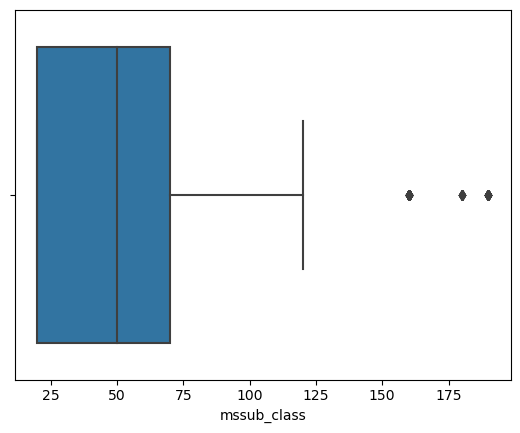

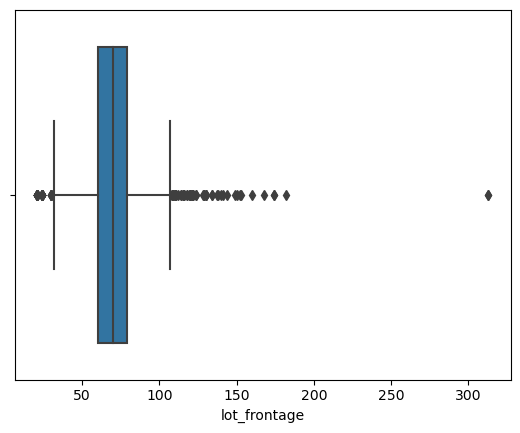

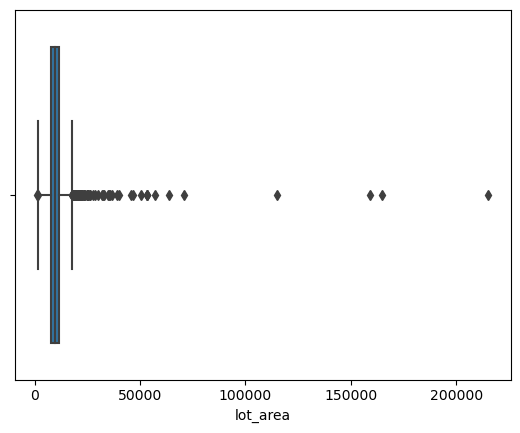

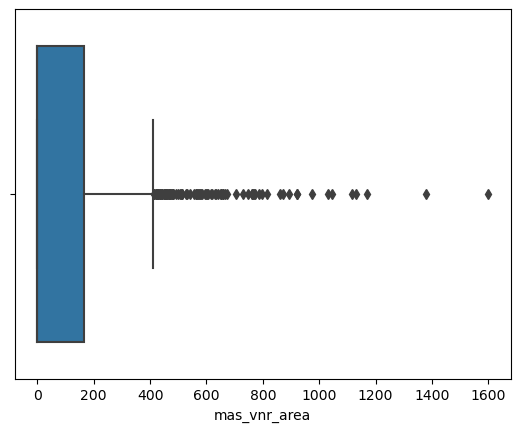

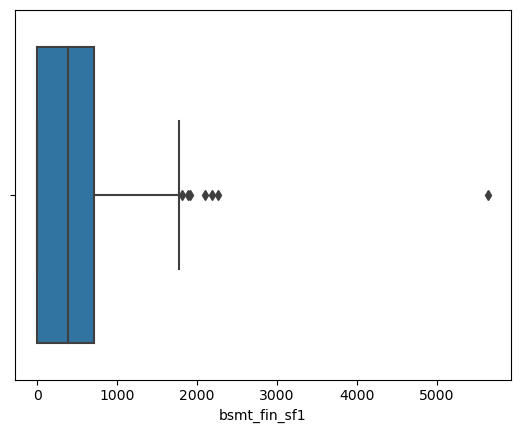

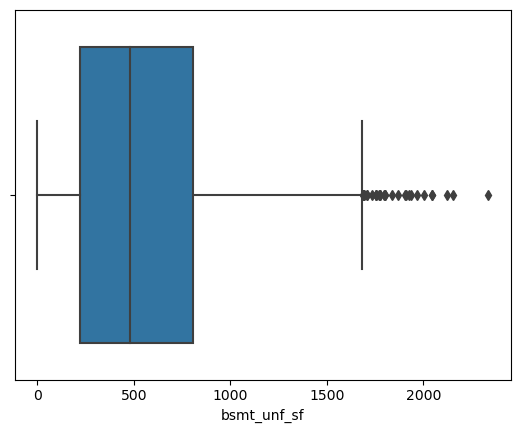

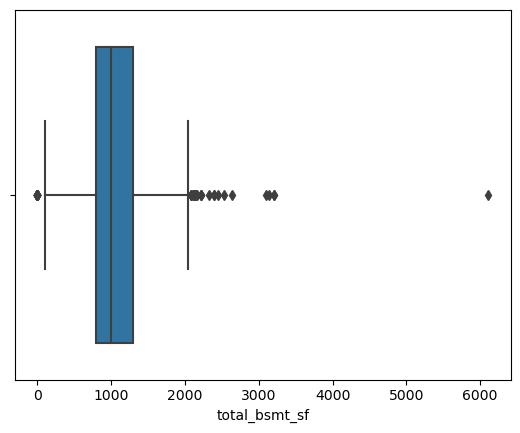

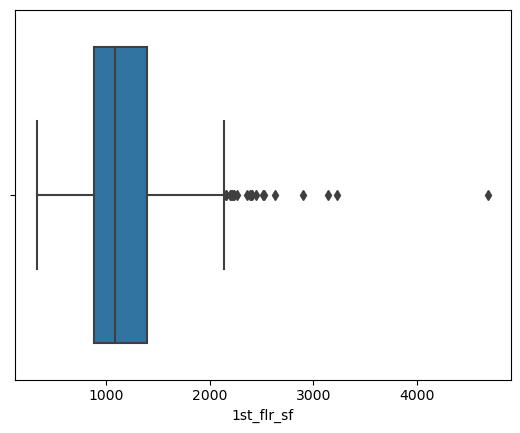

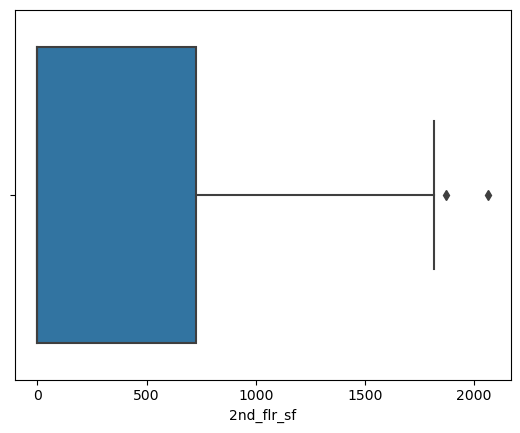

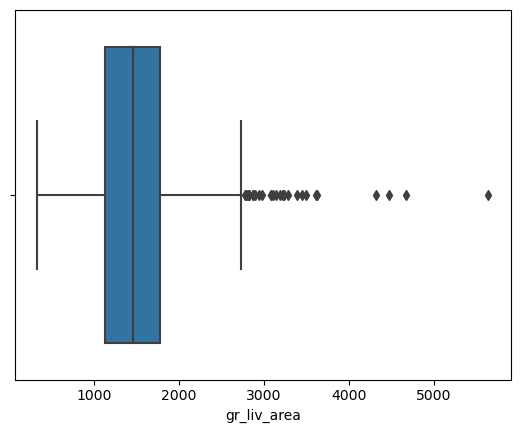

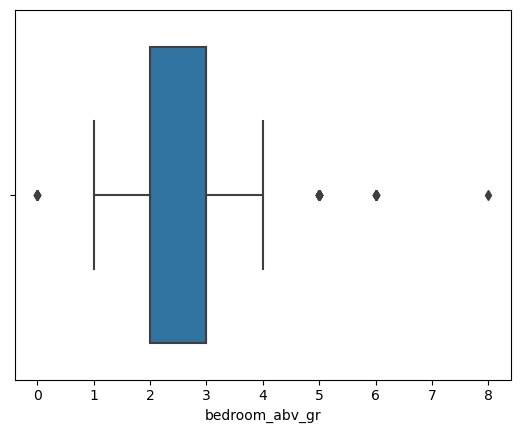

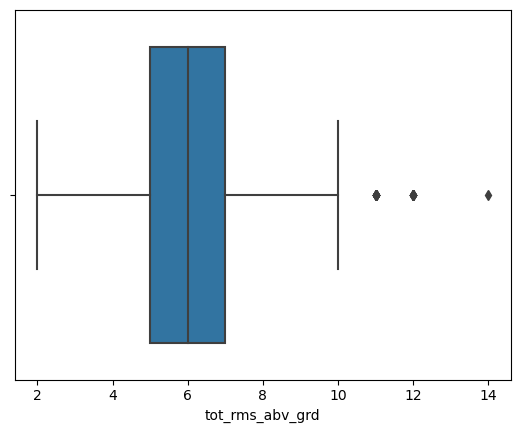

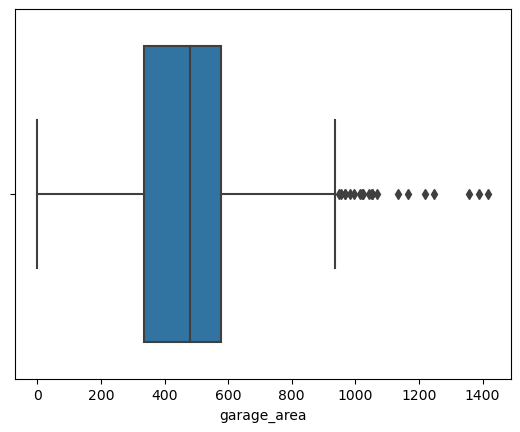

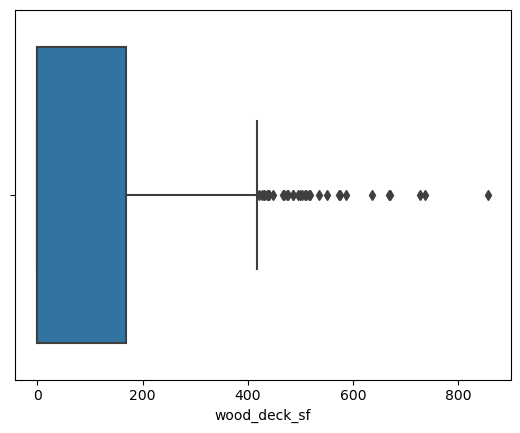

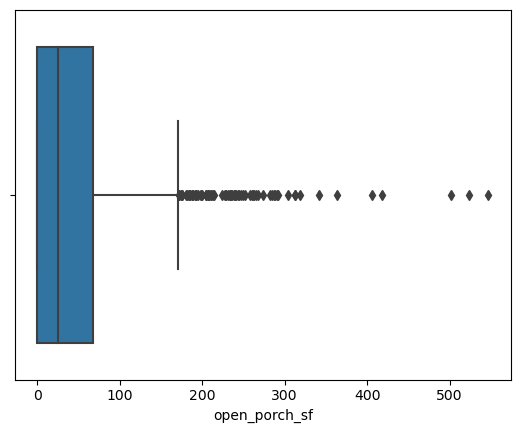

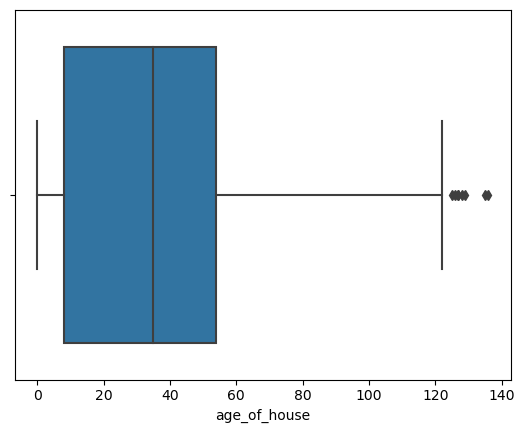

In [736]:
for i in num_var:
    sns.boxplot(x=housing_data[i])
    plt.show()

In [852]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    print("lower bound :" , lwr_bound)
    upr_bound = q3+(1.5*IQR)
    print("upper bound :" , upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [853]:
for data in num_var:
    print("Handling outliers for : "+ data)
    sample_outliers = detect_outliers_iqr(housing_data[data])
    print(sample_outliers)
    median = np.median(housing_data[data])
    print("Median value for data :", data, median)
    for i in sample_outliers:
        housing_data[data] = np.where(housing_data[data]==i, median, housing_data[data])
    print("Handling outliers Done for  : "+ data)
    print("\n")

Handling outliers for : mssub_class
lower bound : -55.0
upper bound : 145.0
[160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]
Median value for data : mssub_class 50.0
Handling outliers Done for  : mssub_class


Handling outliers for : lot_frontage
lower bound : 31.5
upper bound : 107.5
[21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 

# EDA

# Univariate Analysis

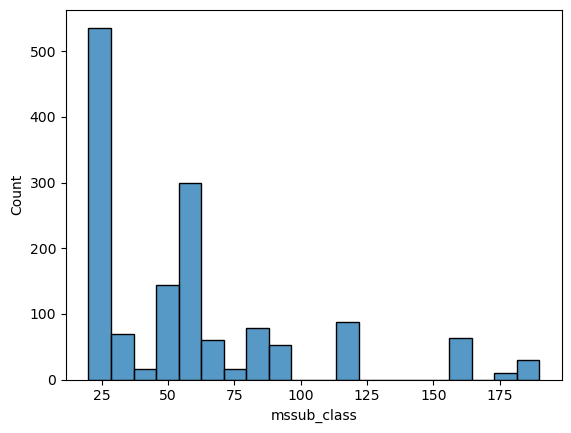

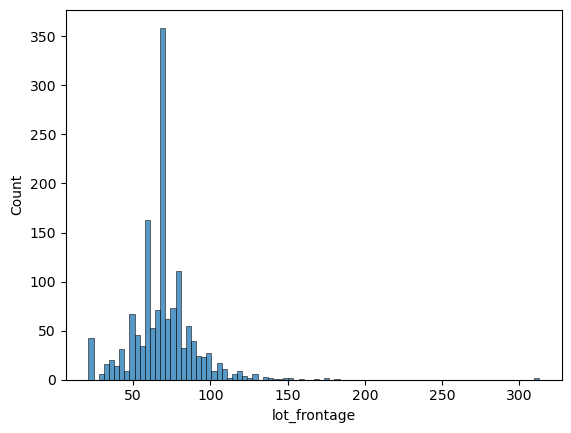

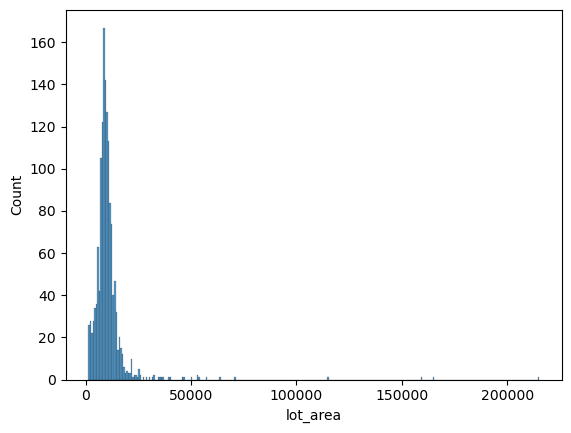

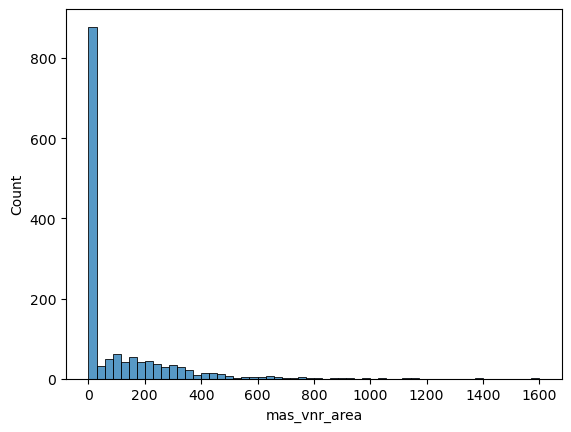

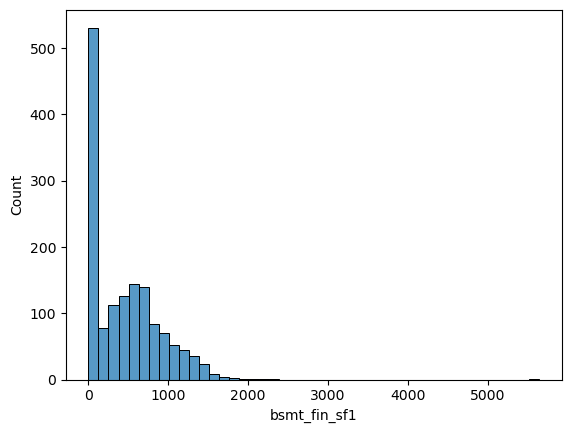

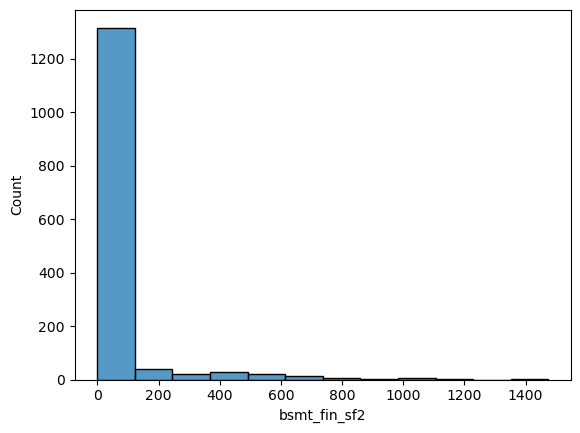

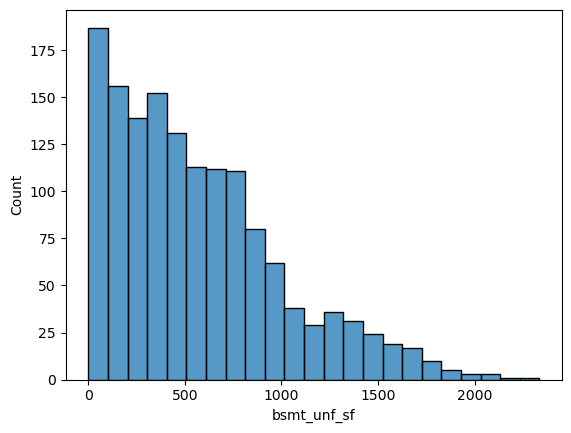

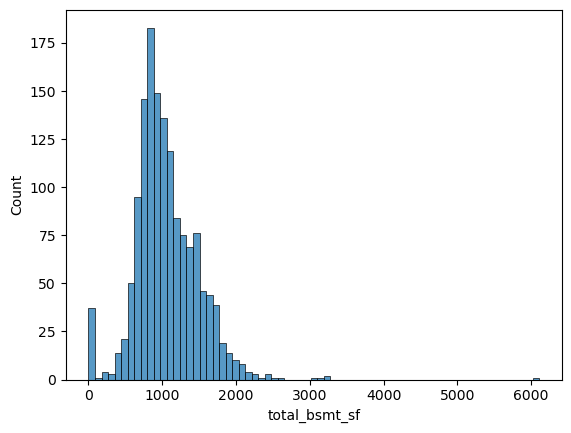

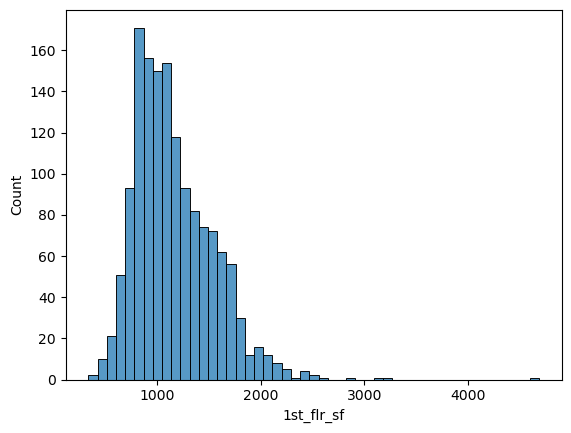

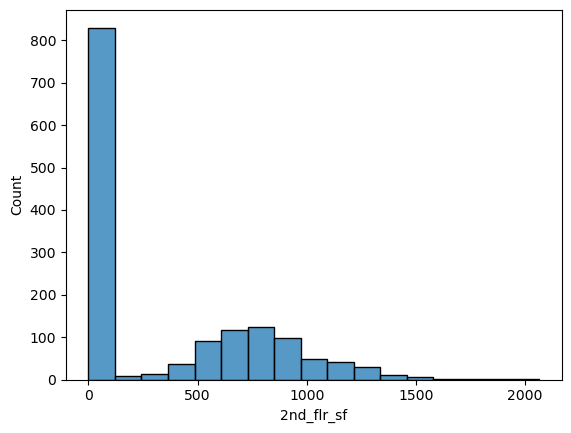

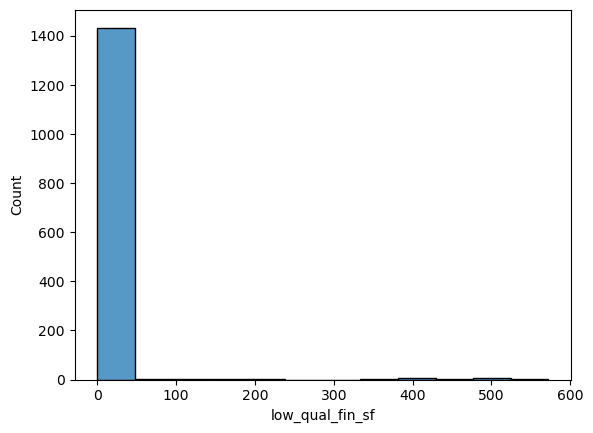

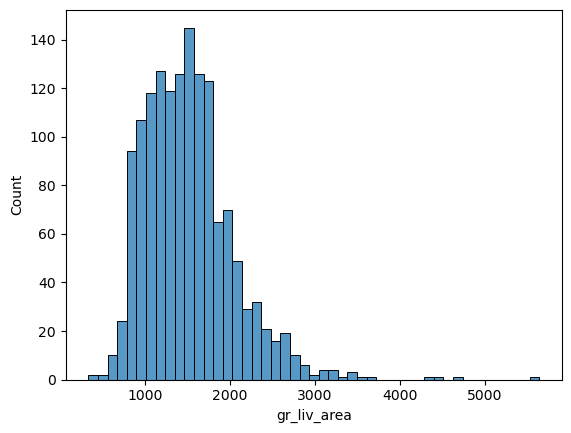

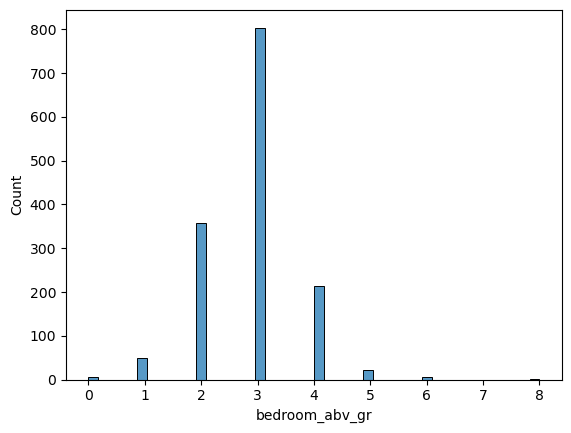

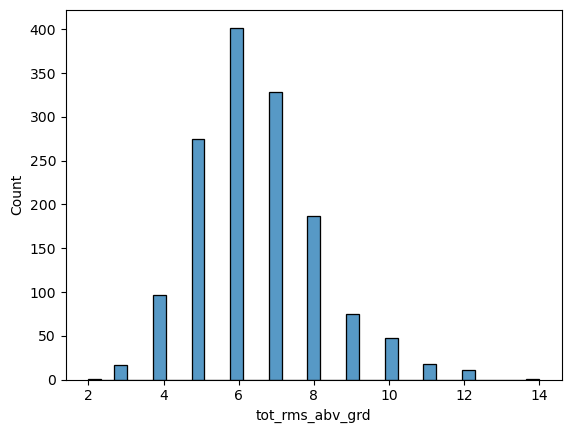

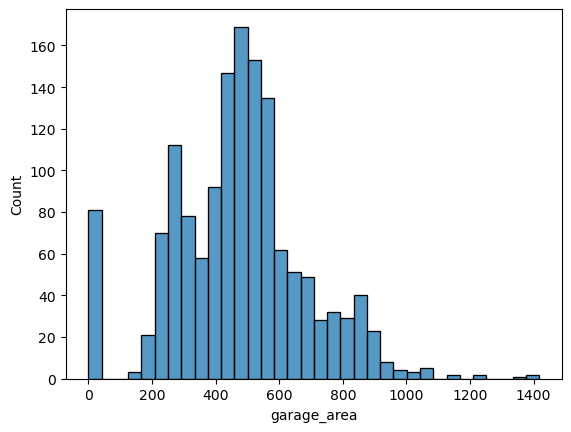

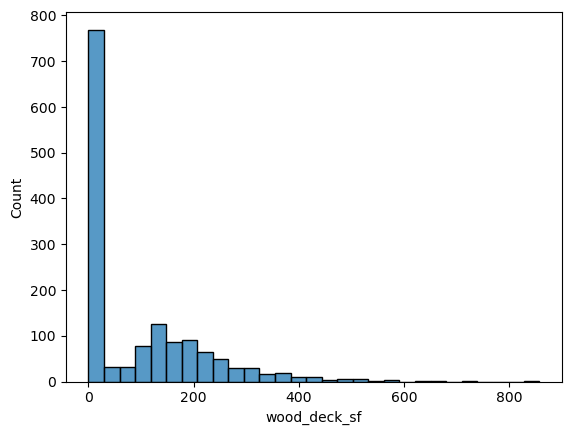

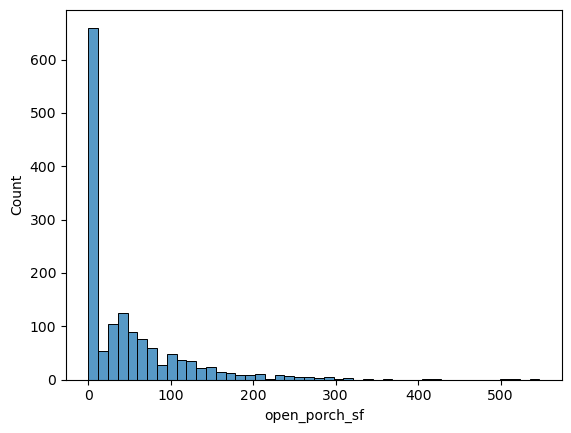

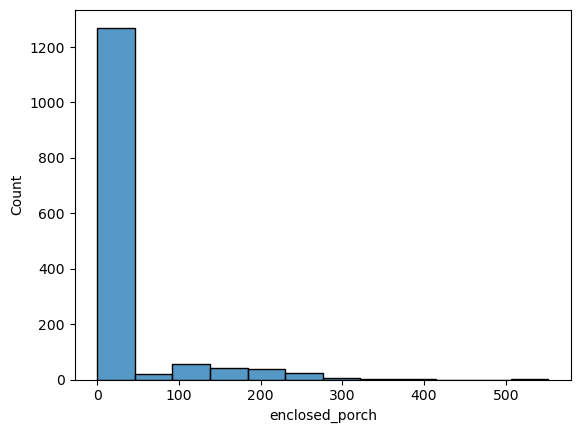

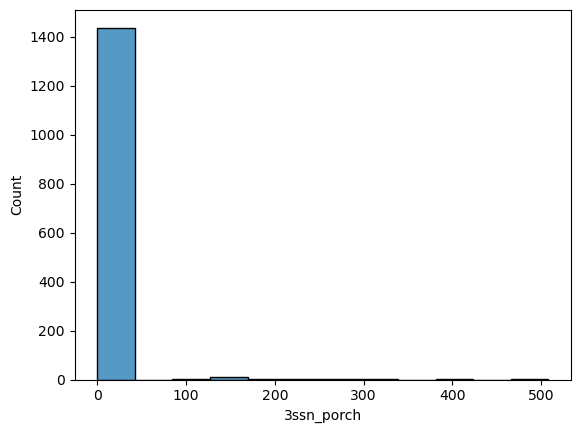

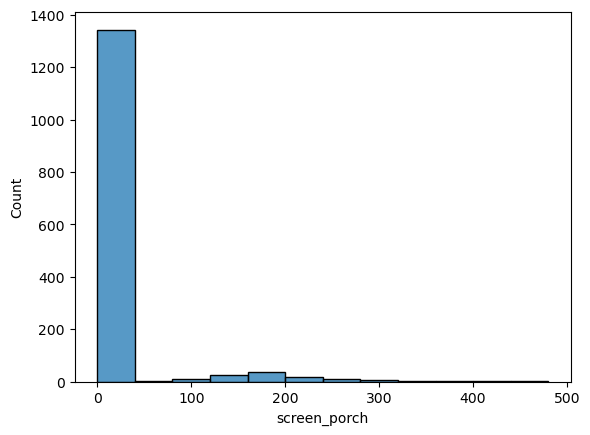

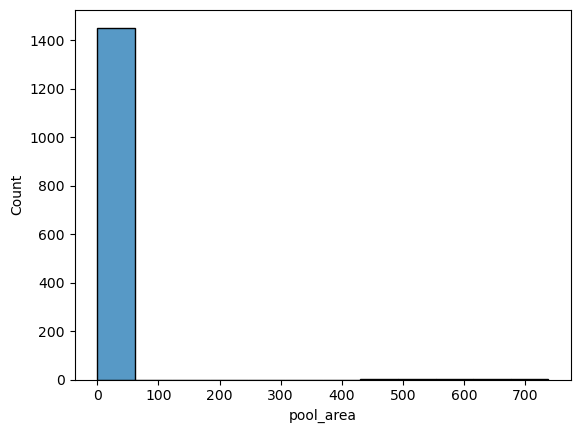

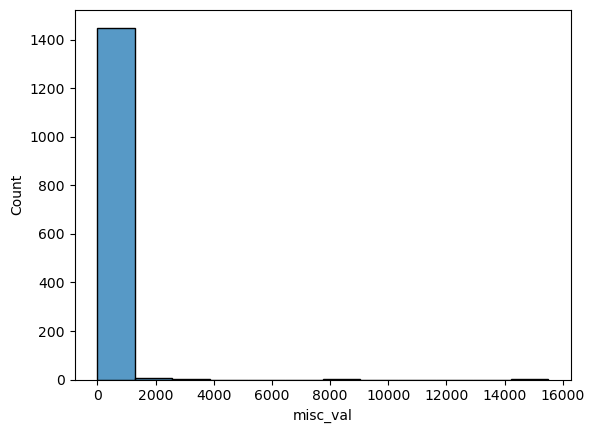

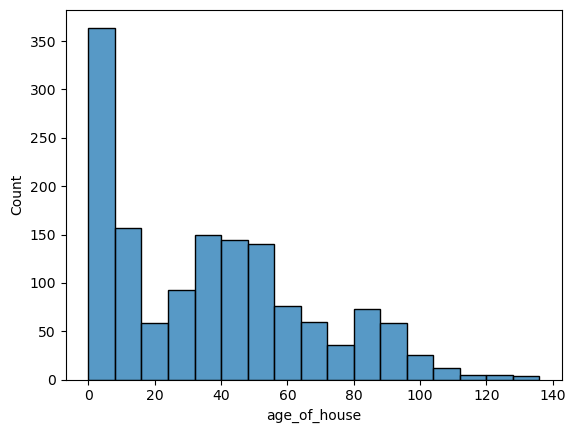

In [562]:
for i in num_var:
    sns.histplot(x=housing_data[i])
    plt.show()

# Bivariate Analysis

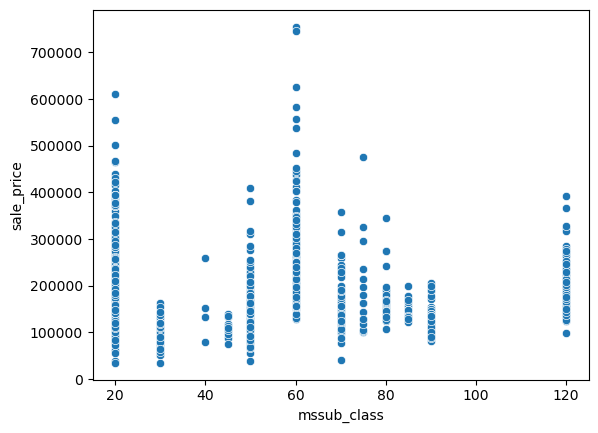

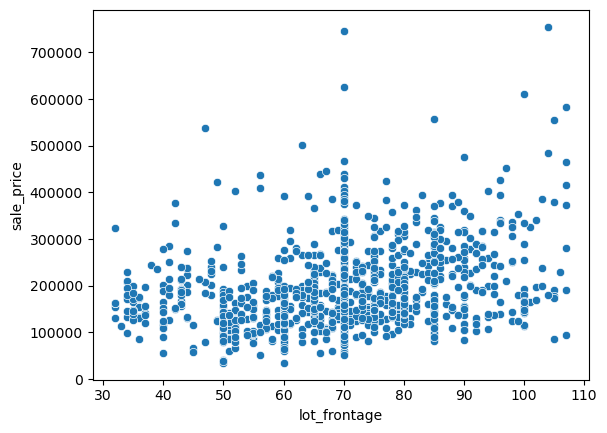

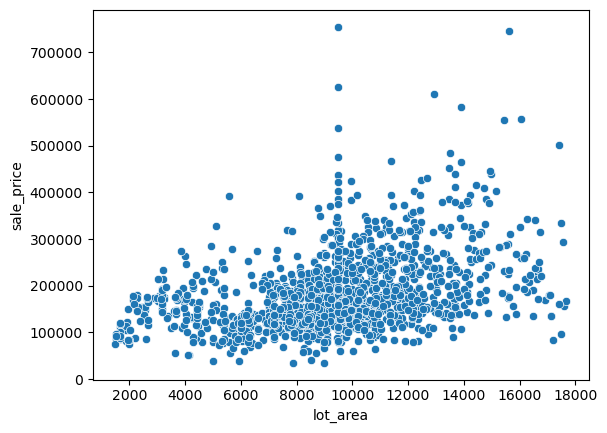

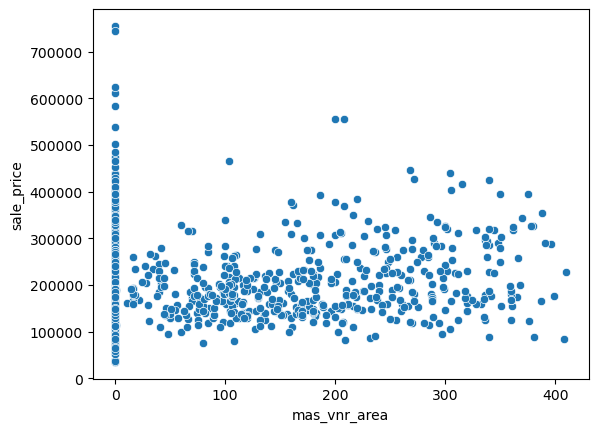

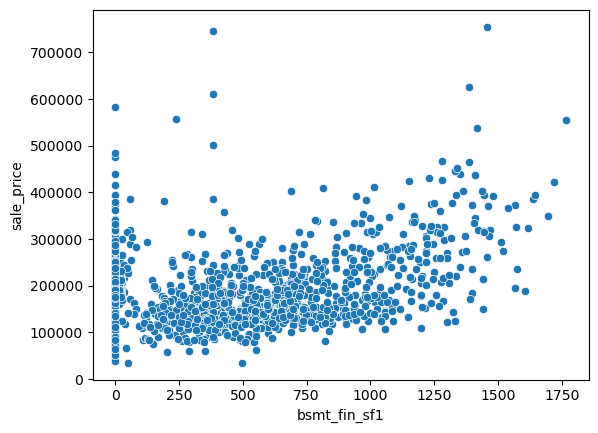

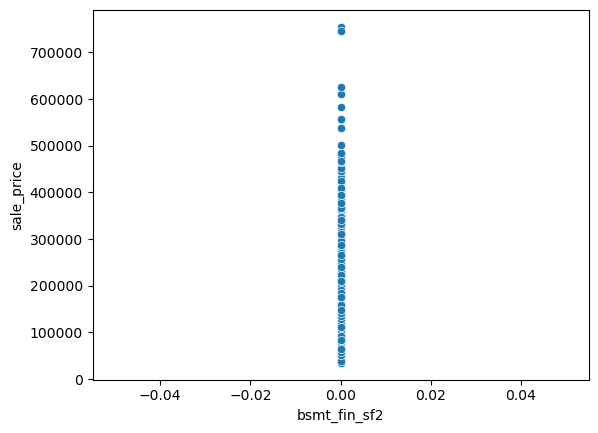

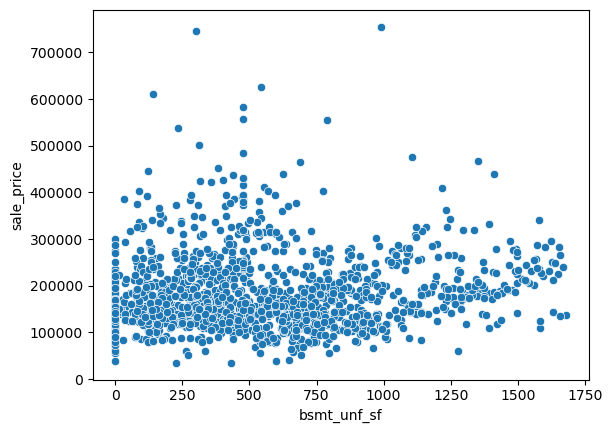

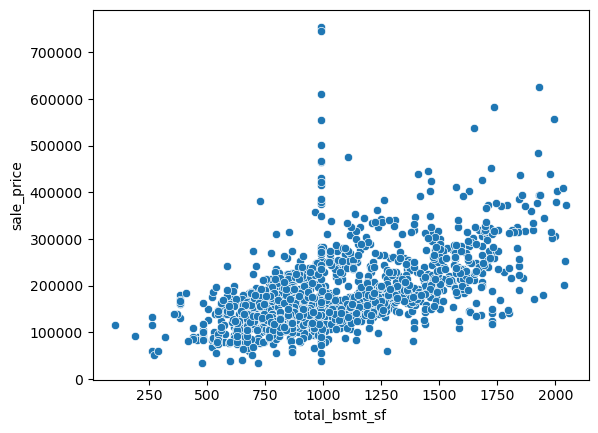

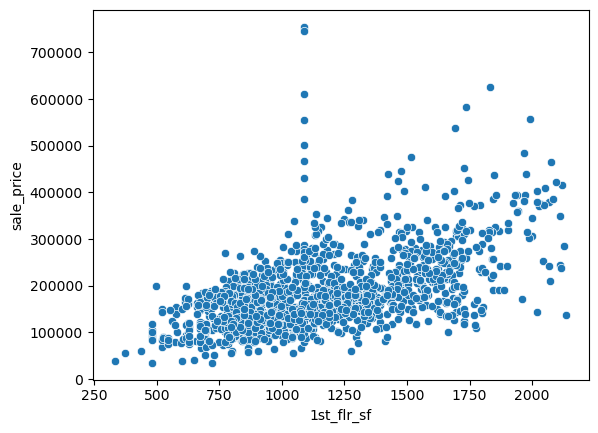

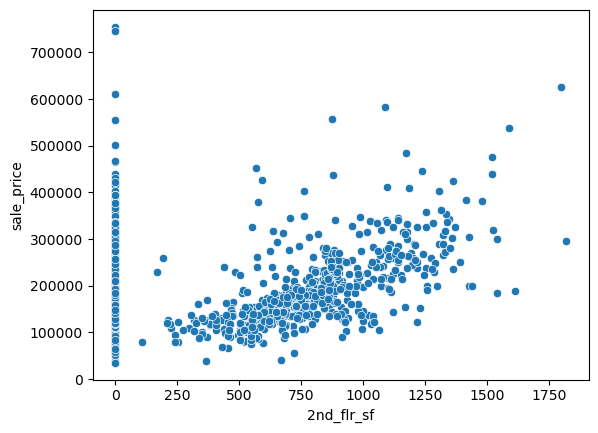

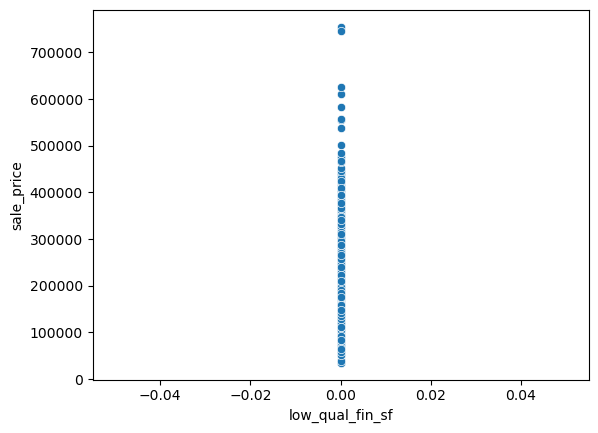

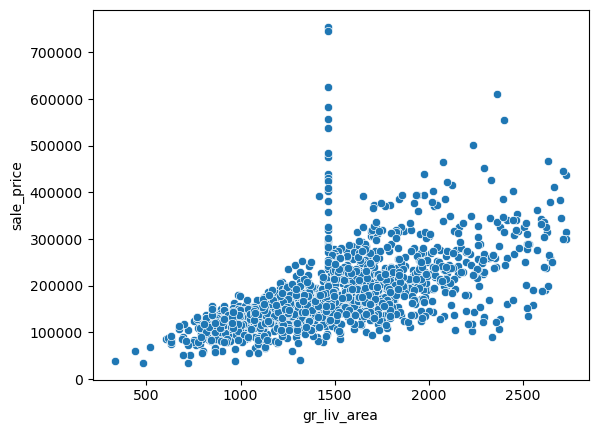

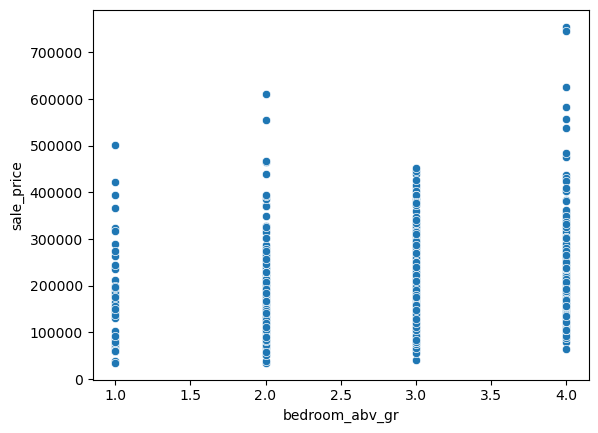

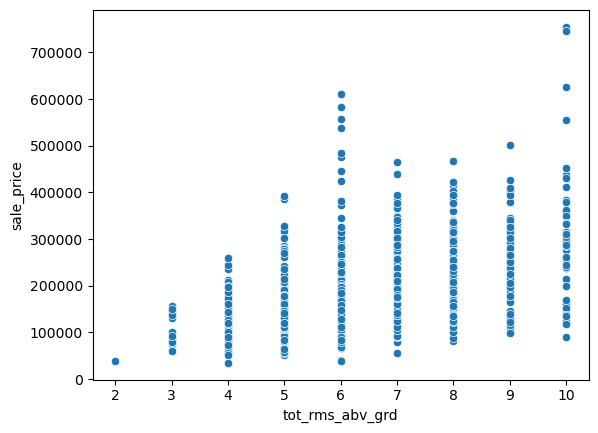

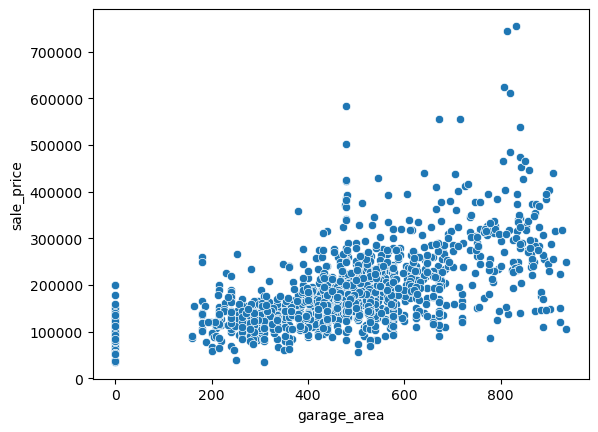

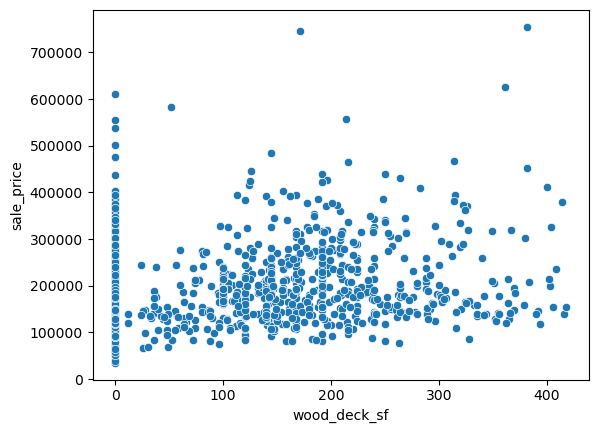

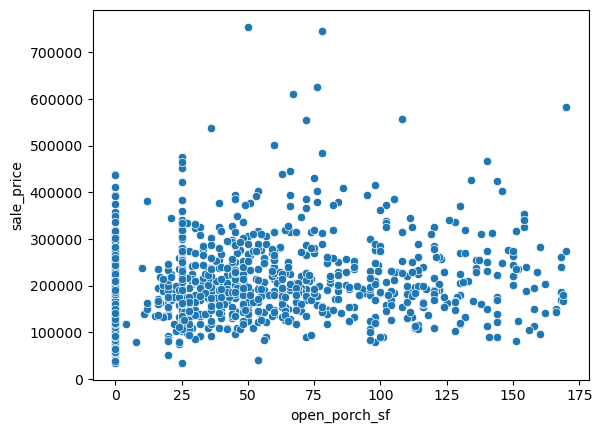

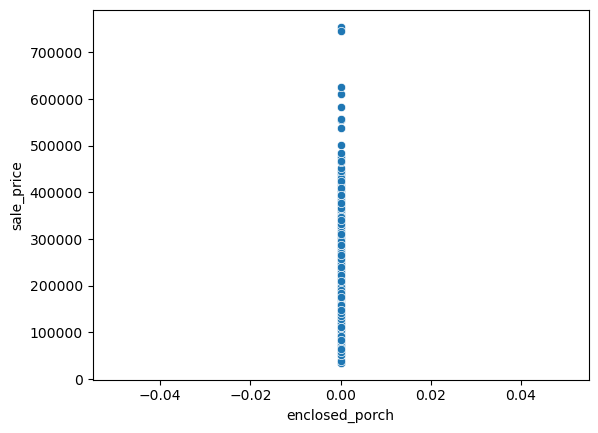

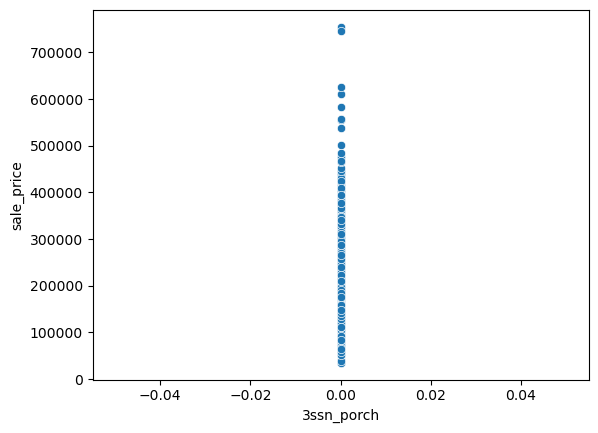

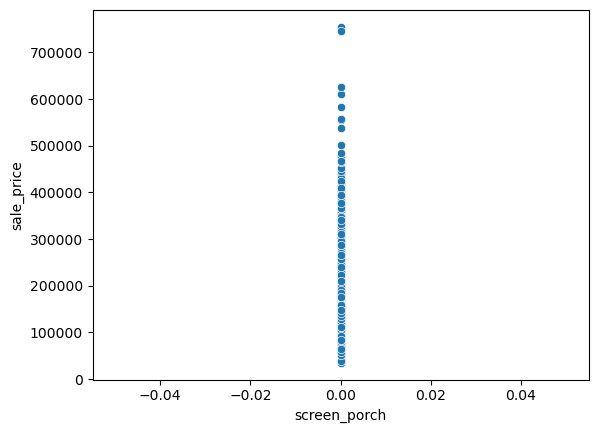

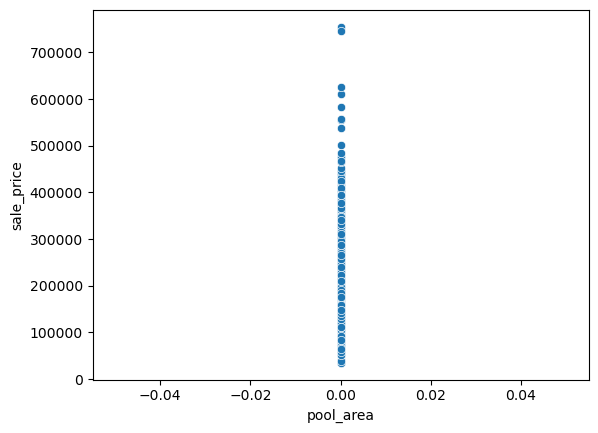

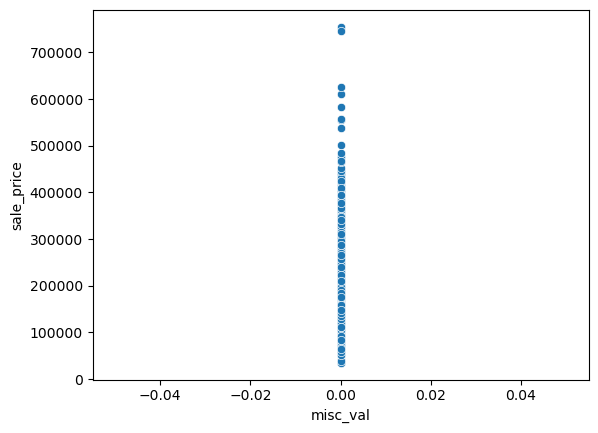

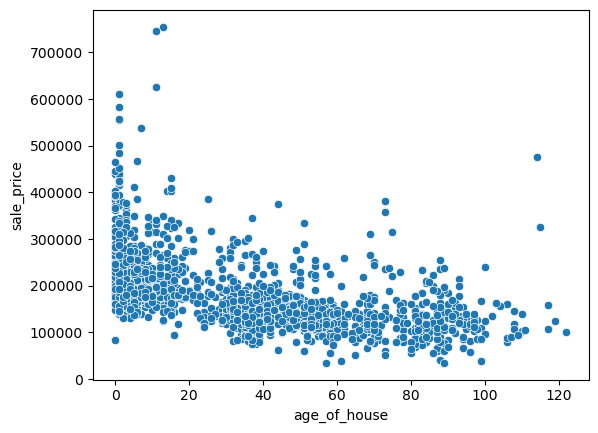

In [688]:
for i in num_var:
    sns.scatterplot(x=housing_data[i],y=housing_data["sale_price"])
    plt.show()

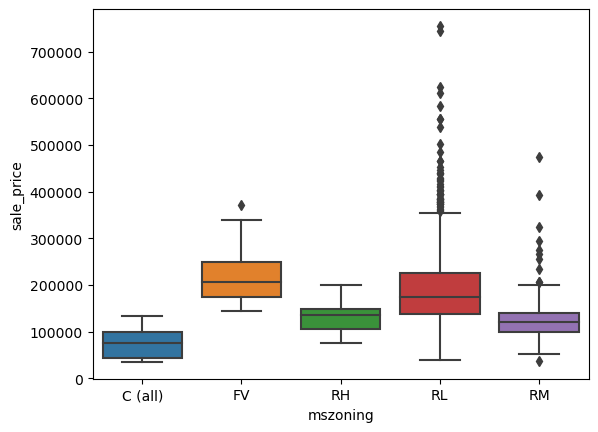

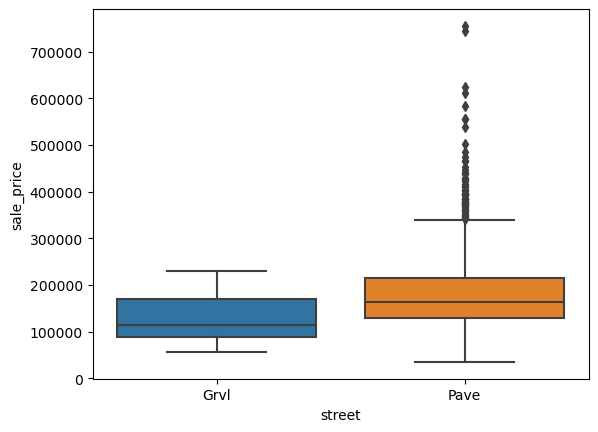

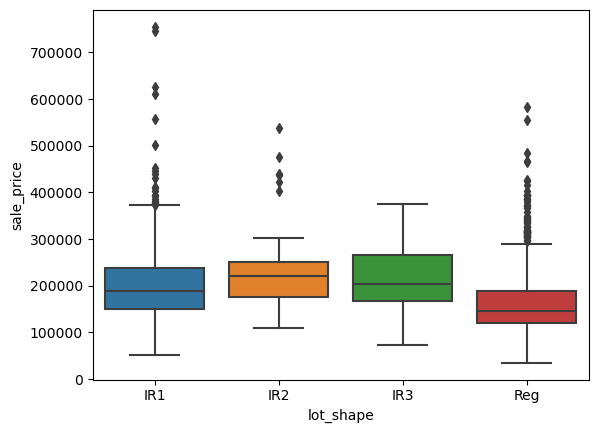

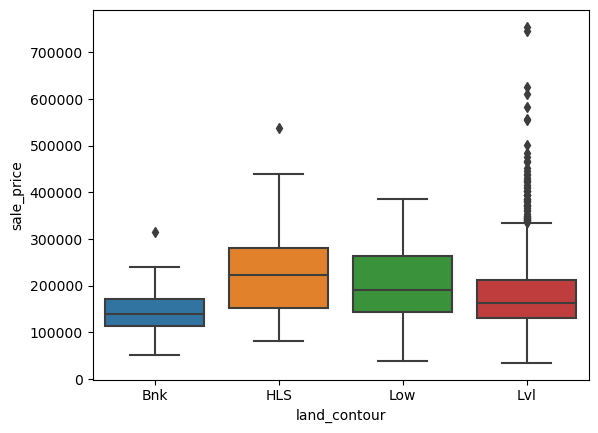

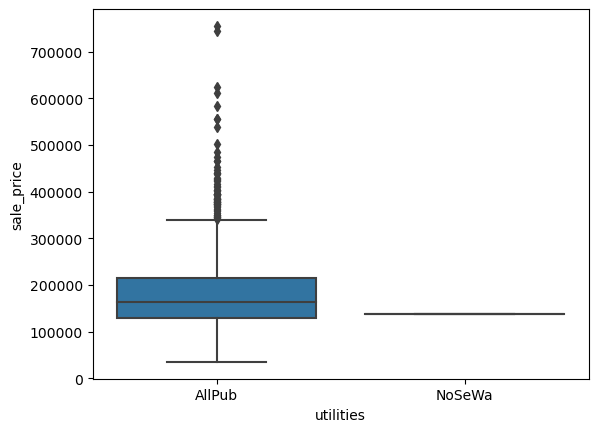

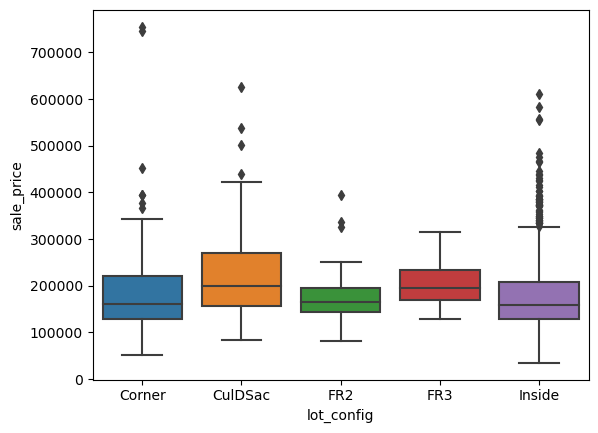

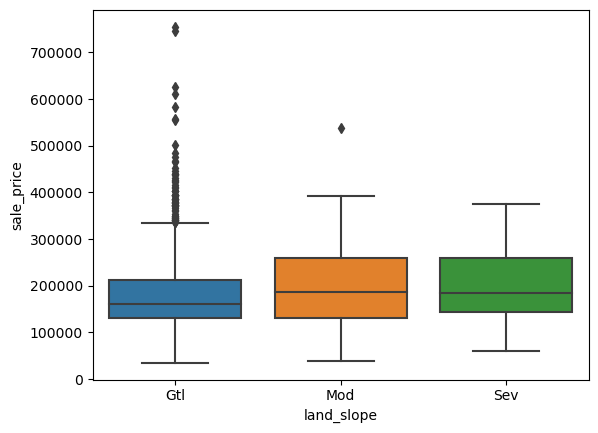

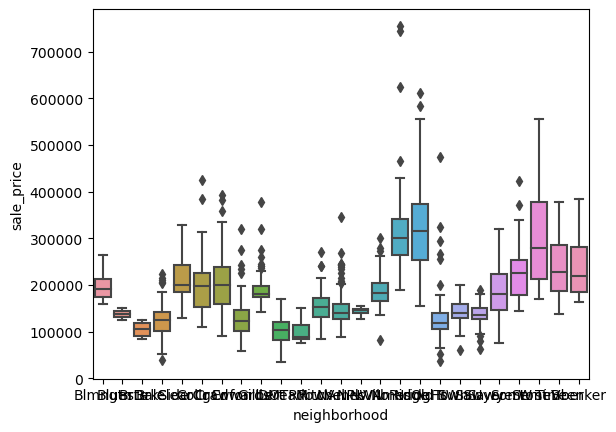

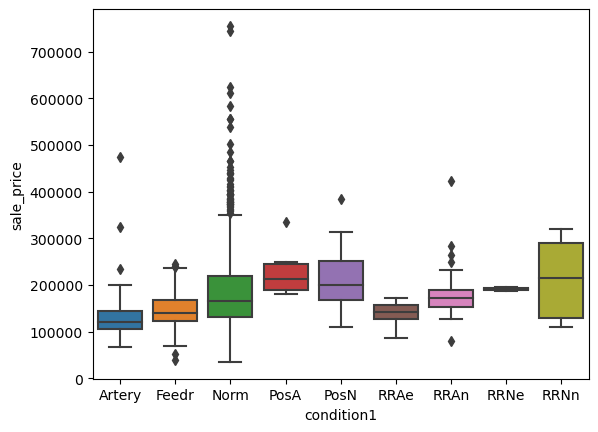

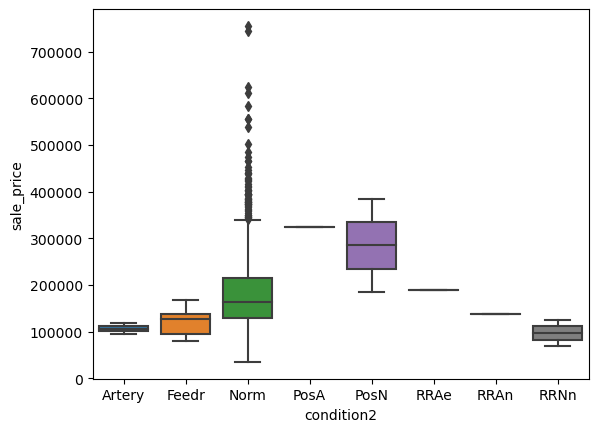

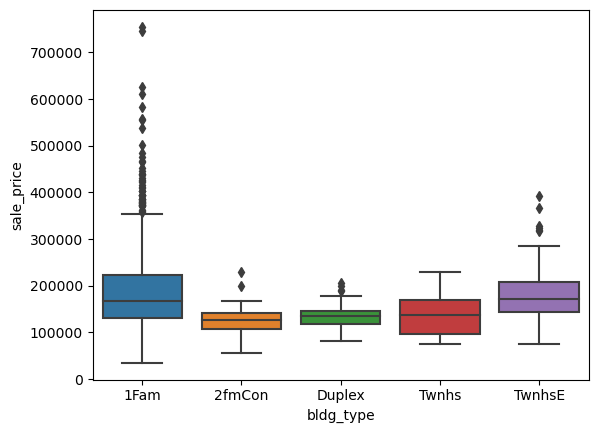

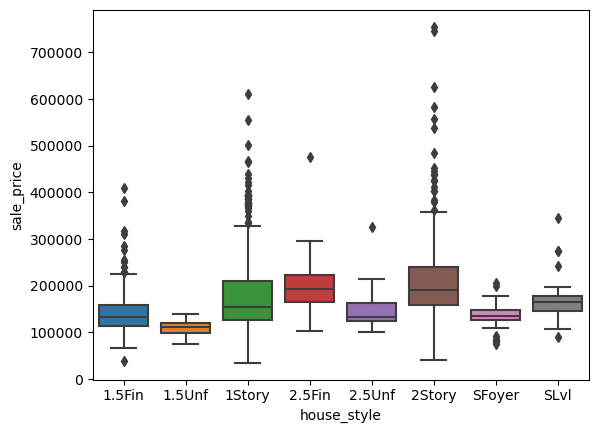

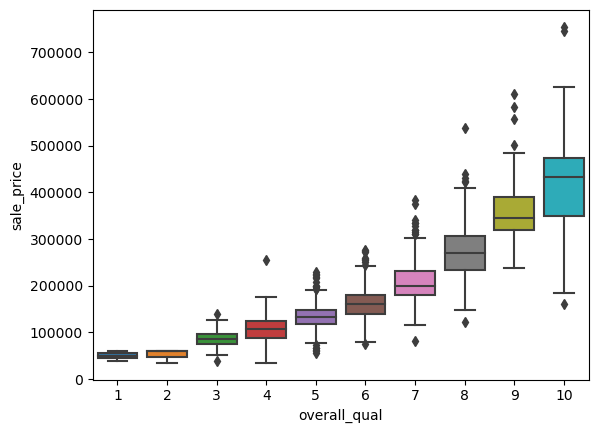

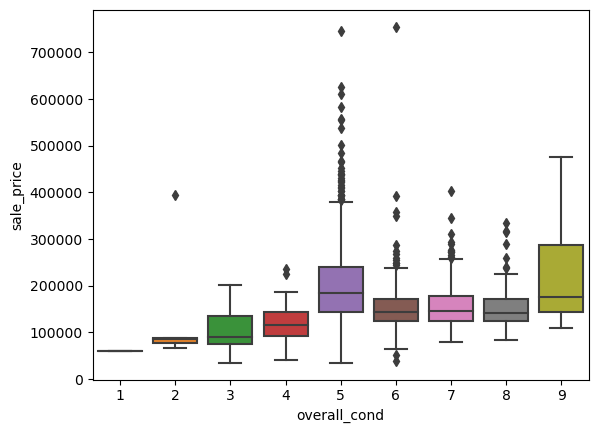

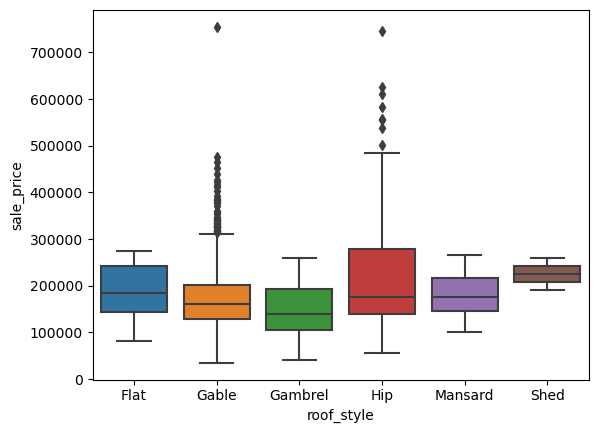

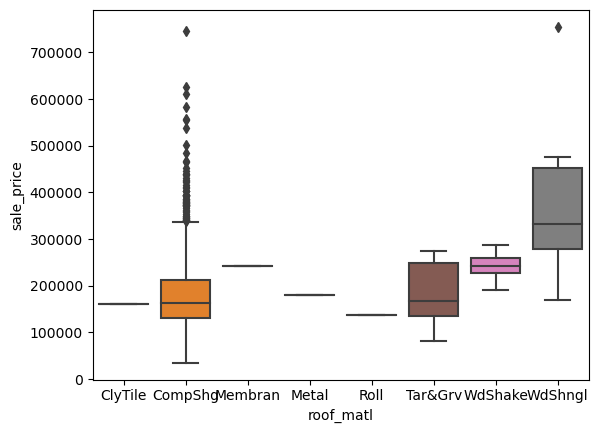

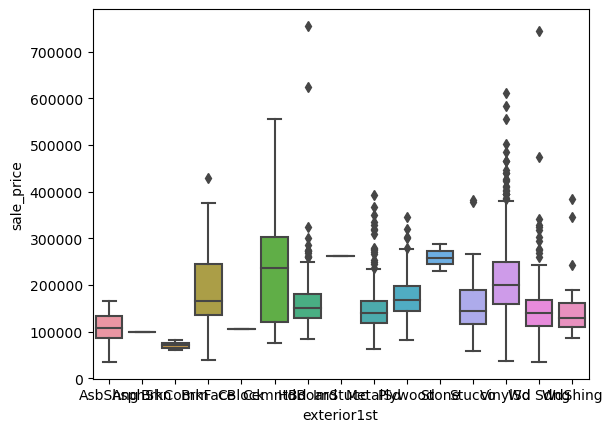

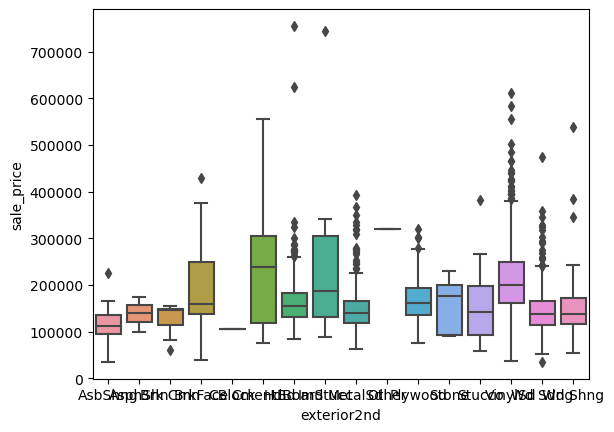

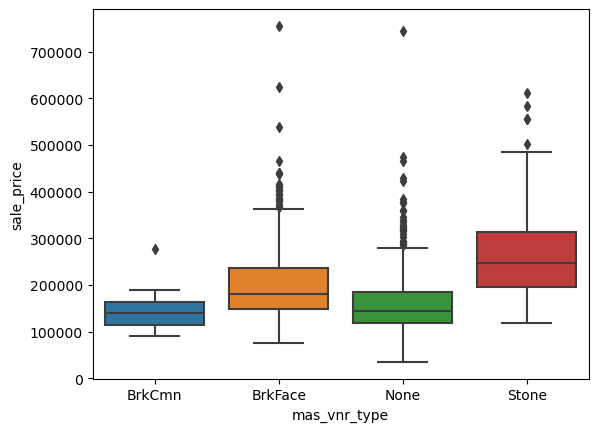

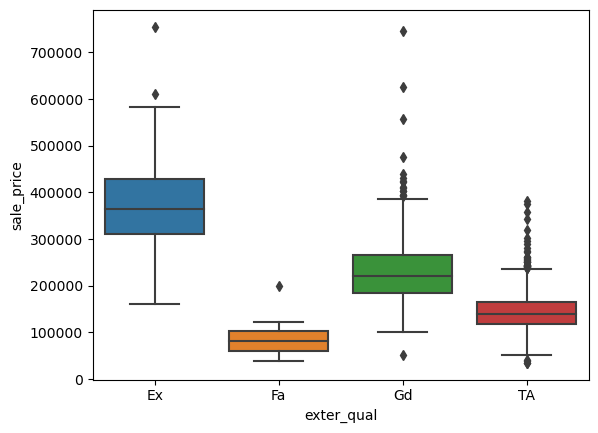

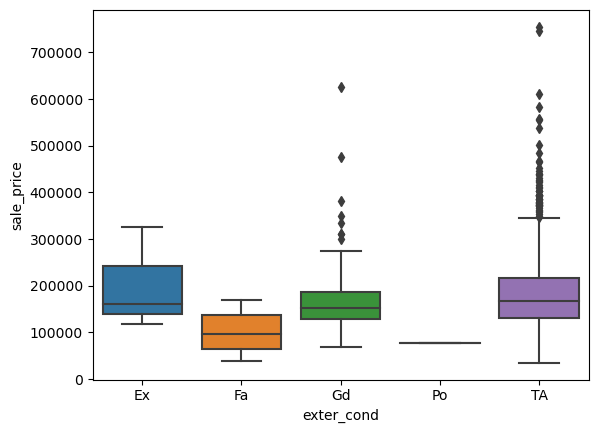

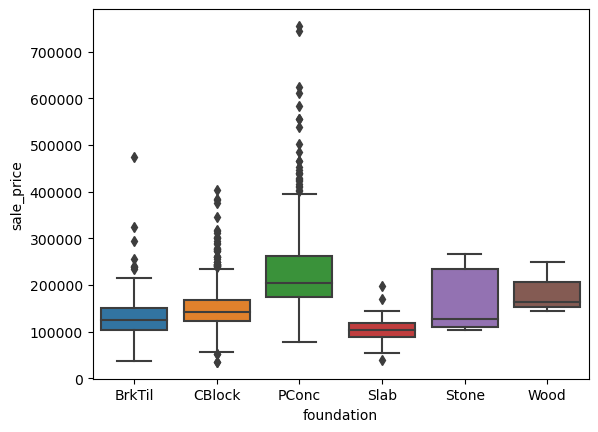

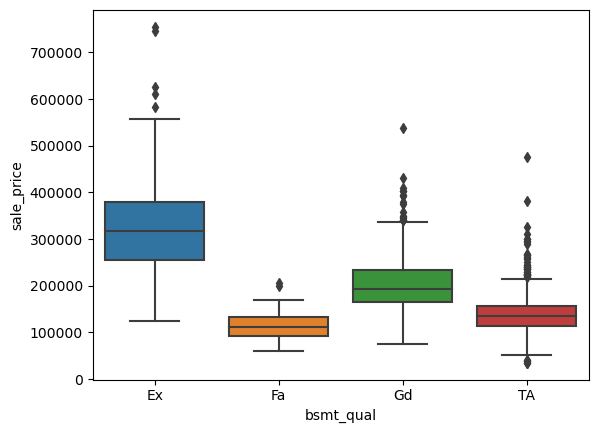

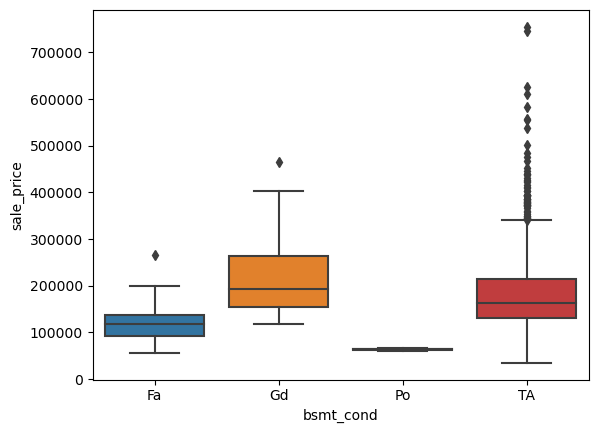

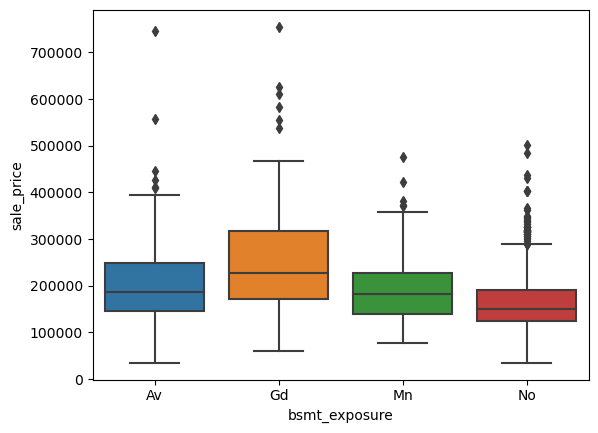

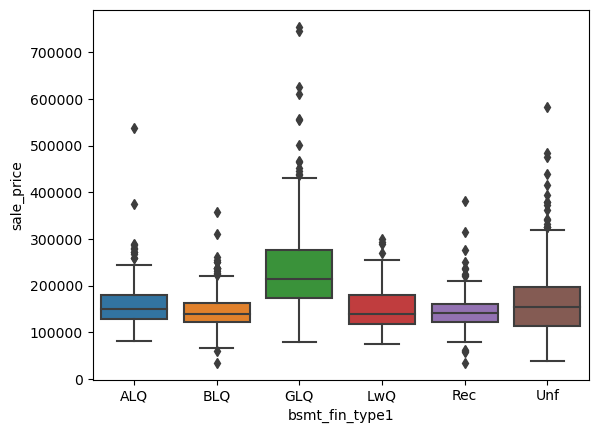

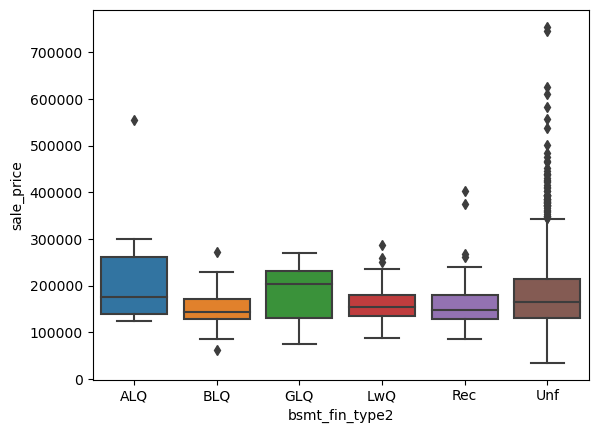

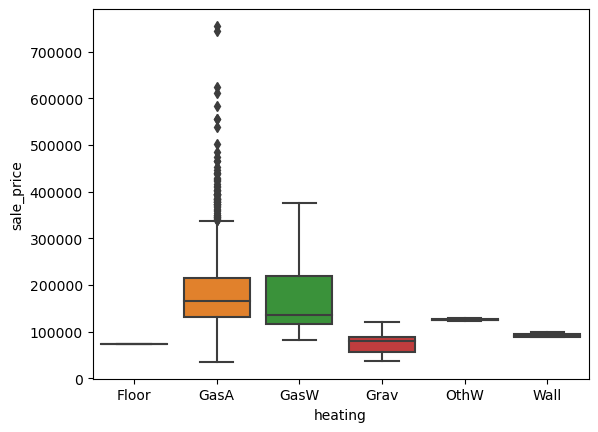

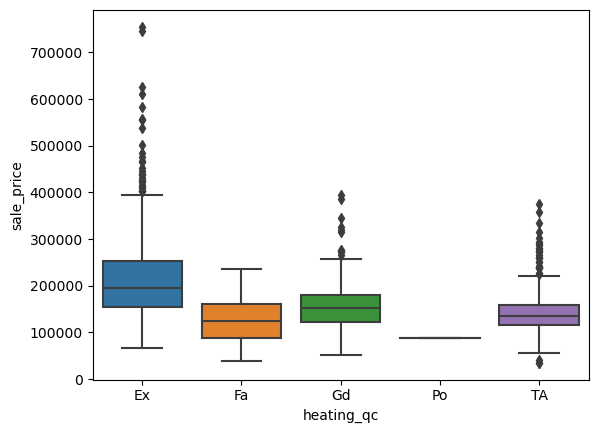

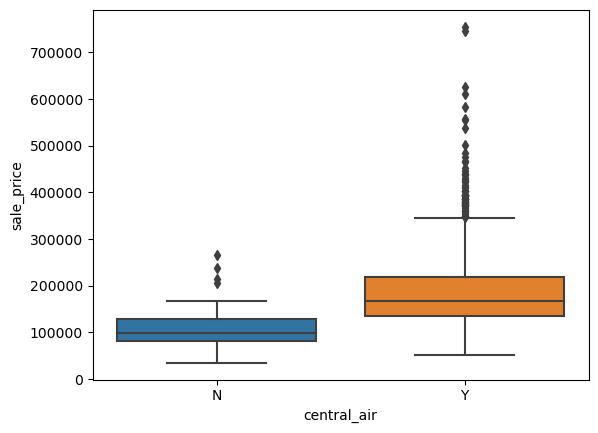

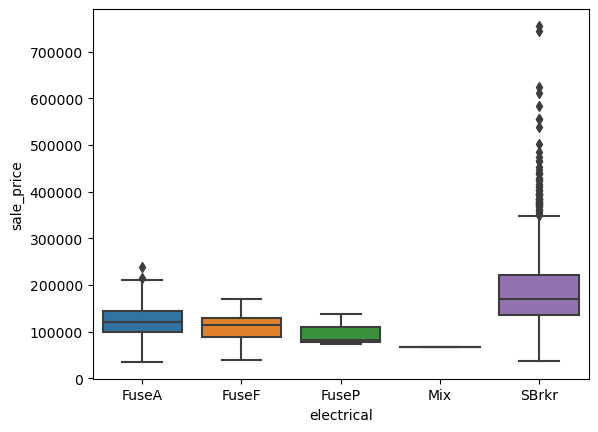

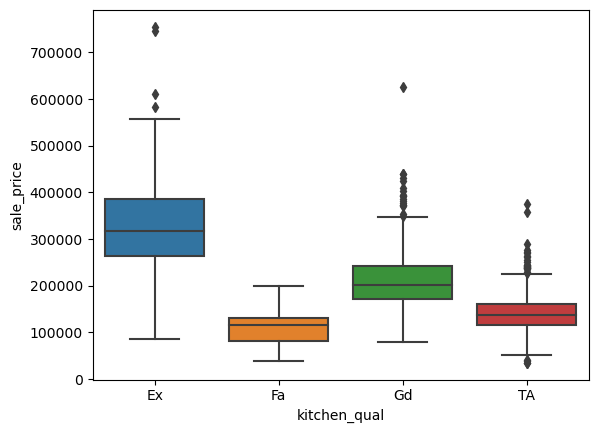

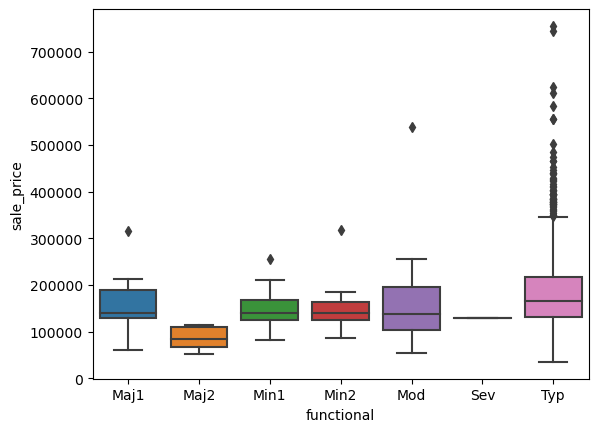

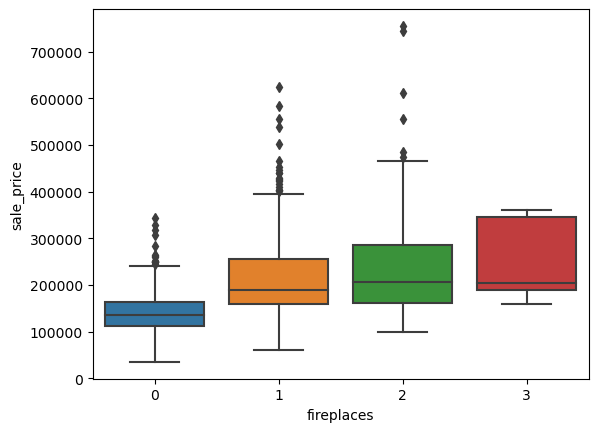

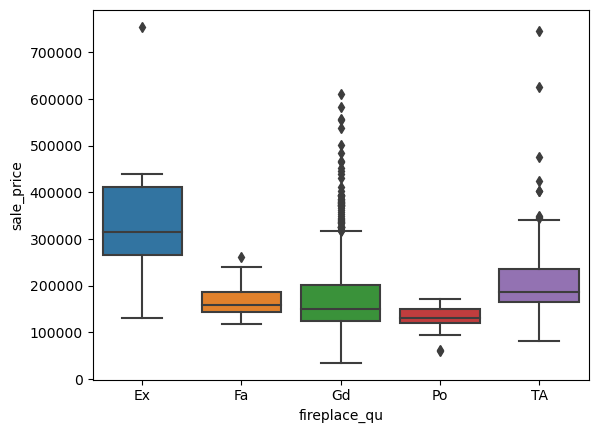

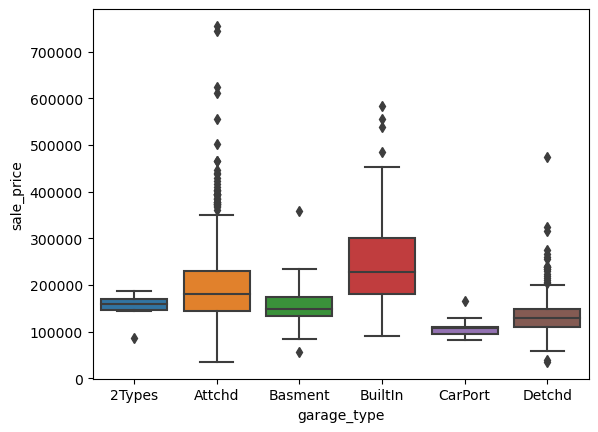

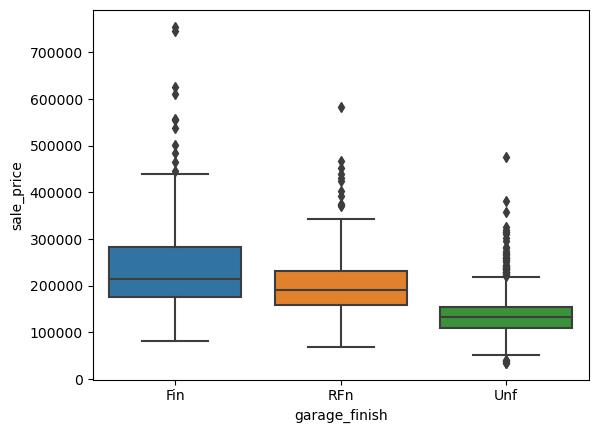

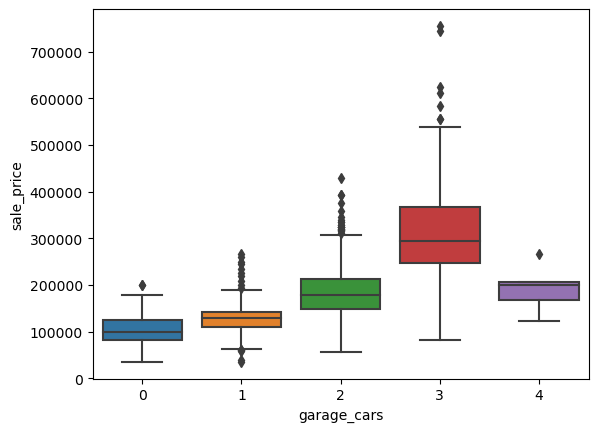

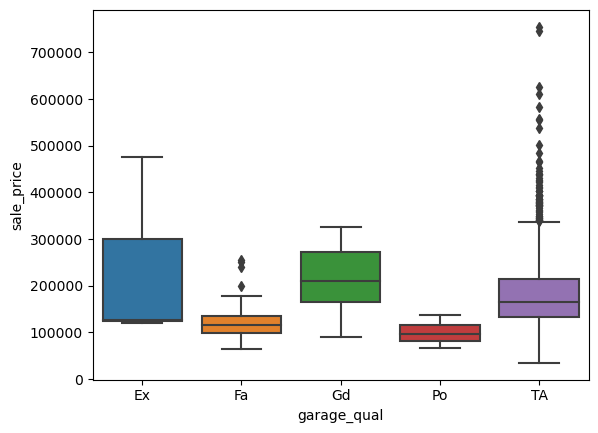

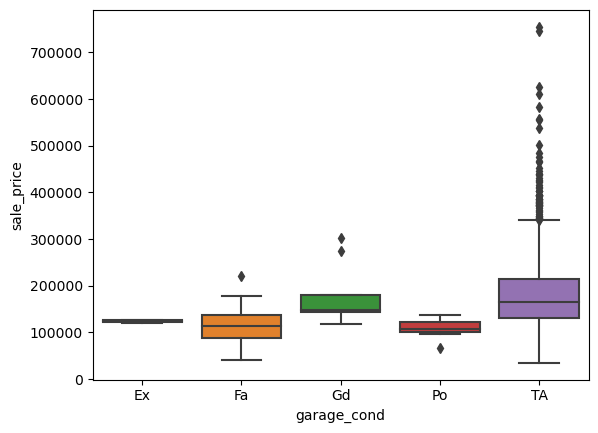

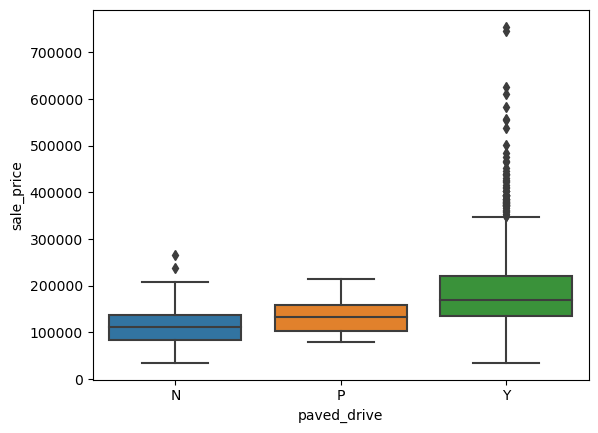

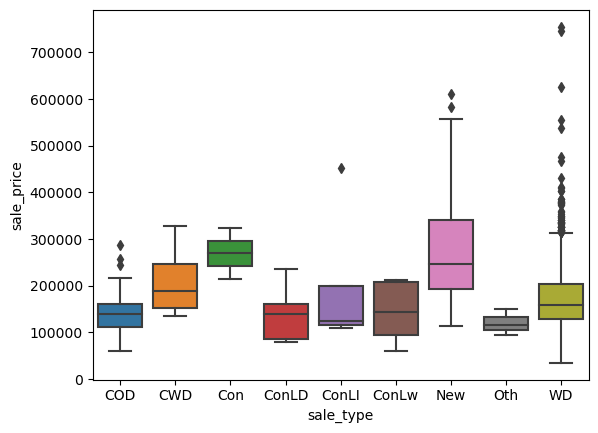

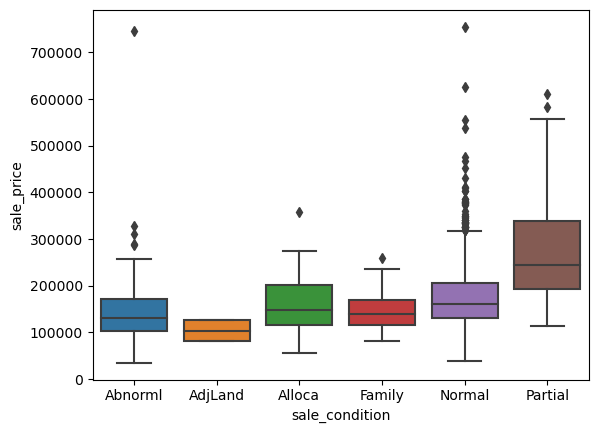

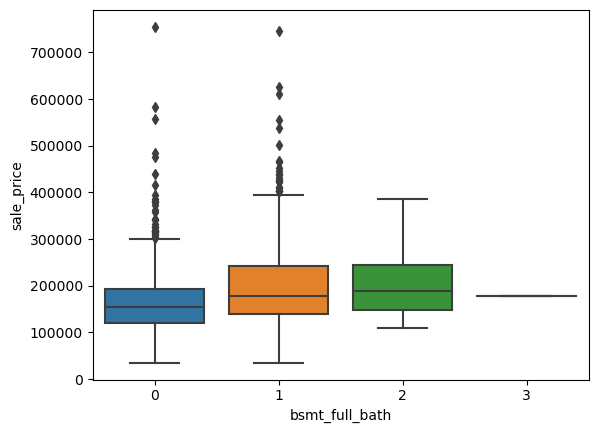

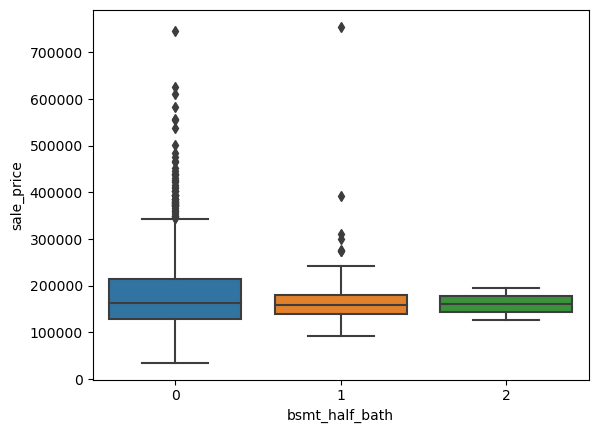

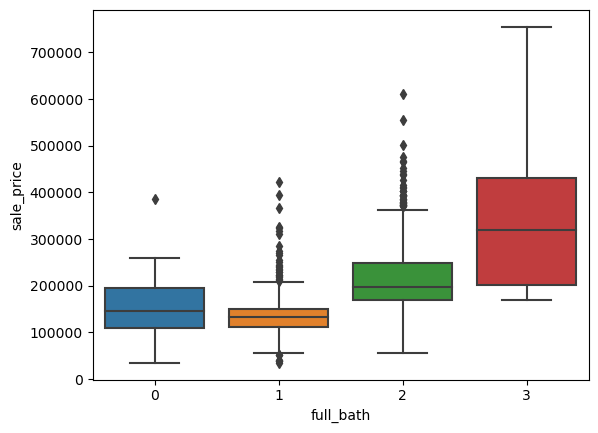

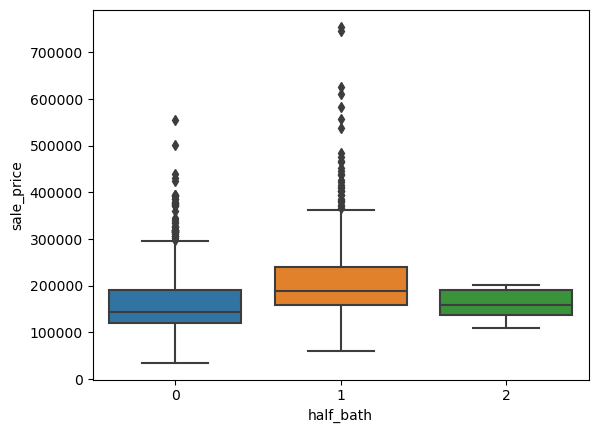

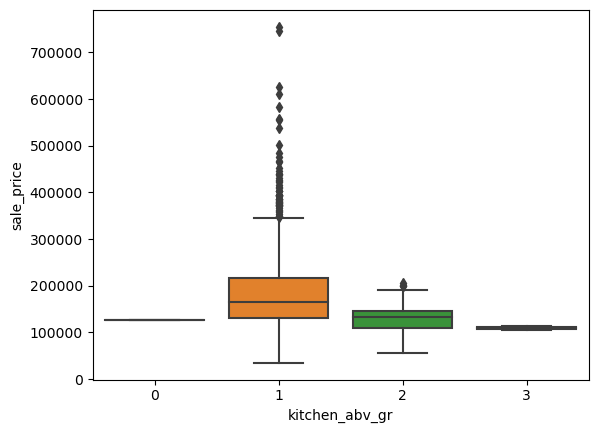

In [496]:
for i in cat_vars:
    sns.boxplot(x=housing_data[i],y=housing_data["sale_price"])
    plt.show()

# Multivariate Analysis

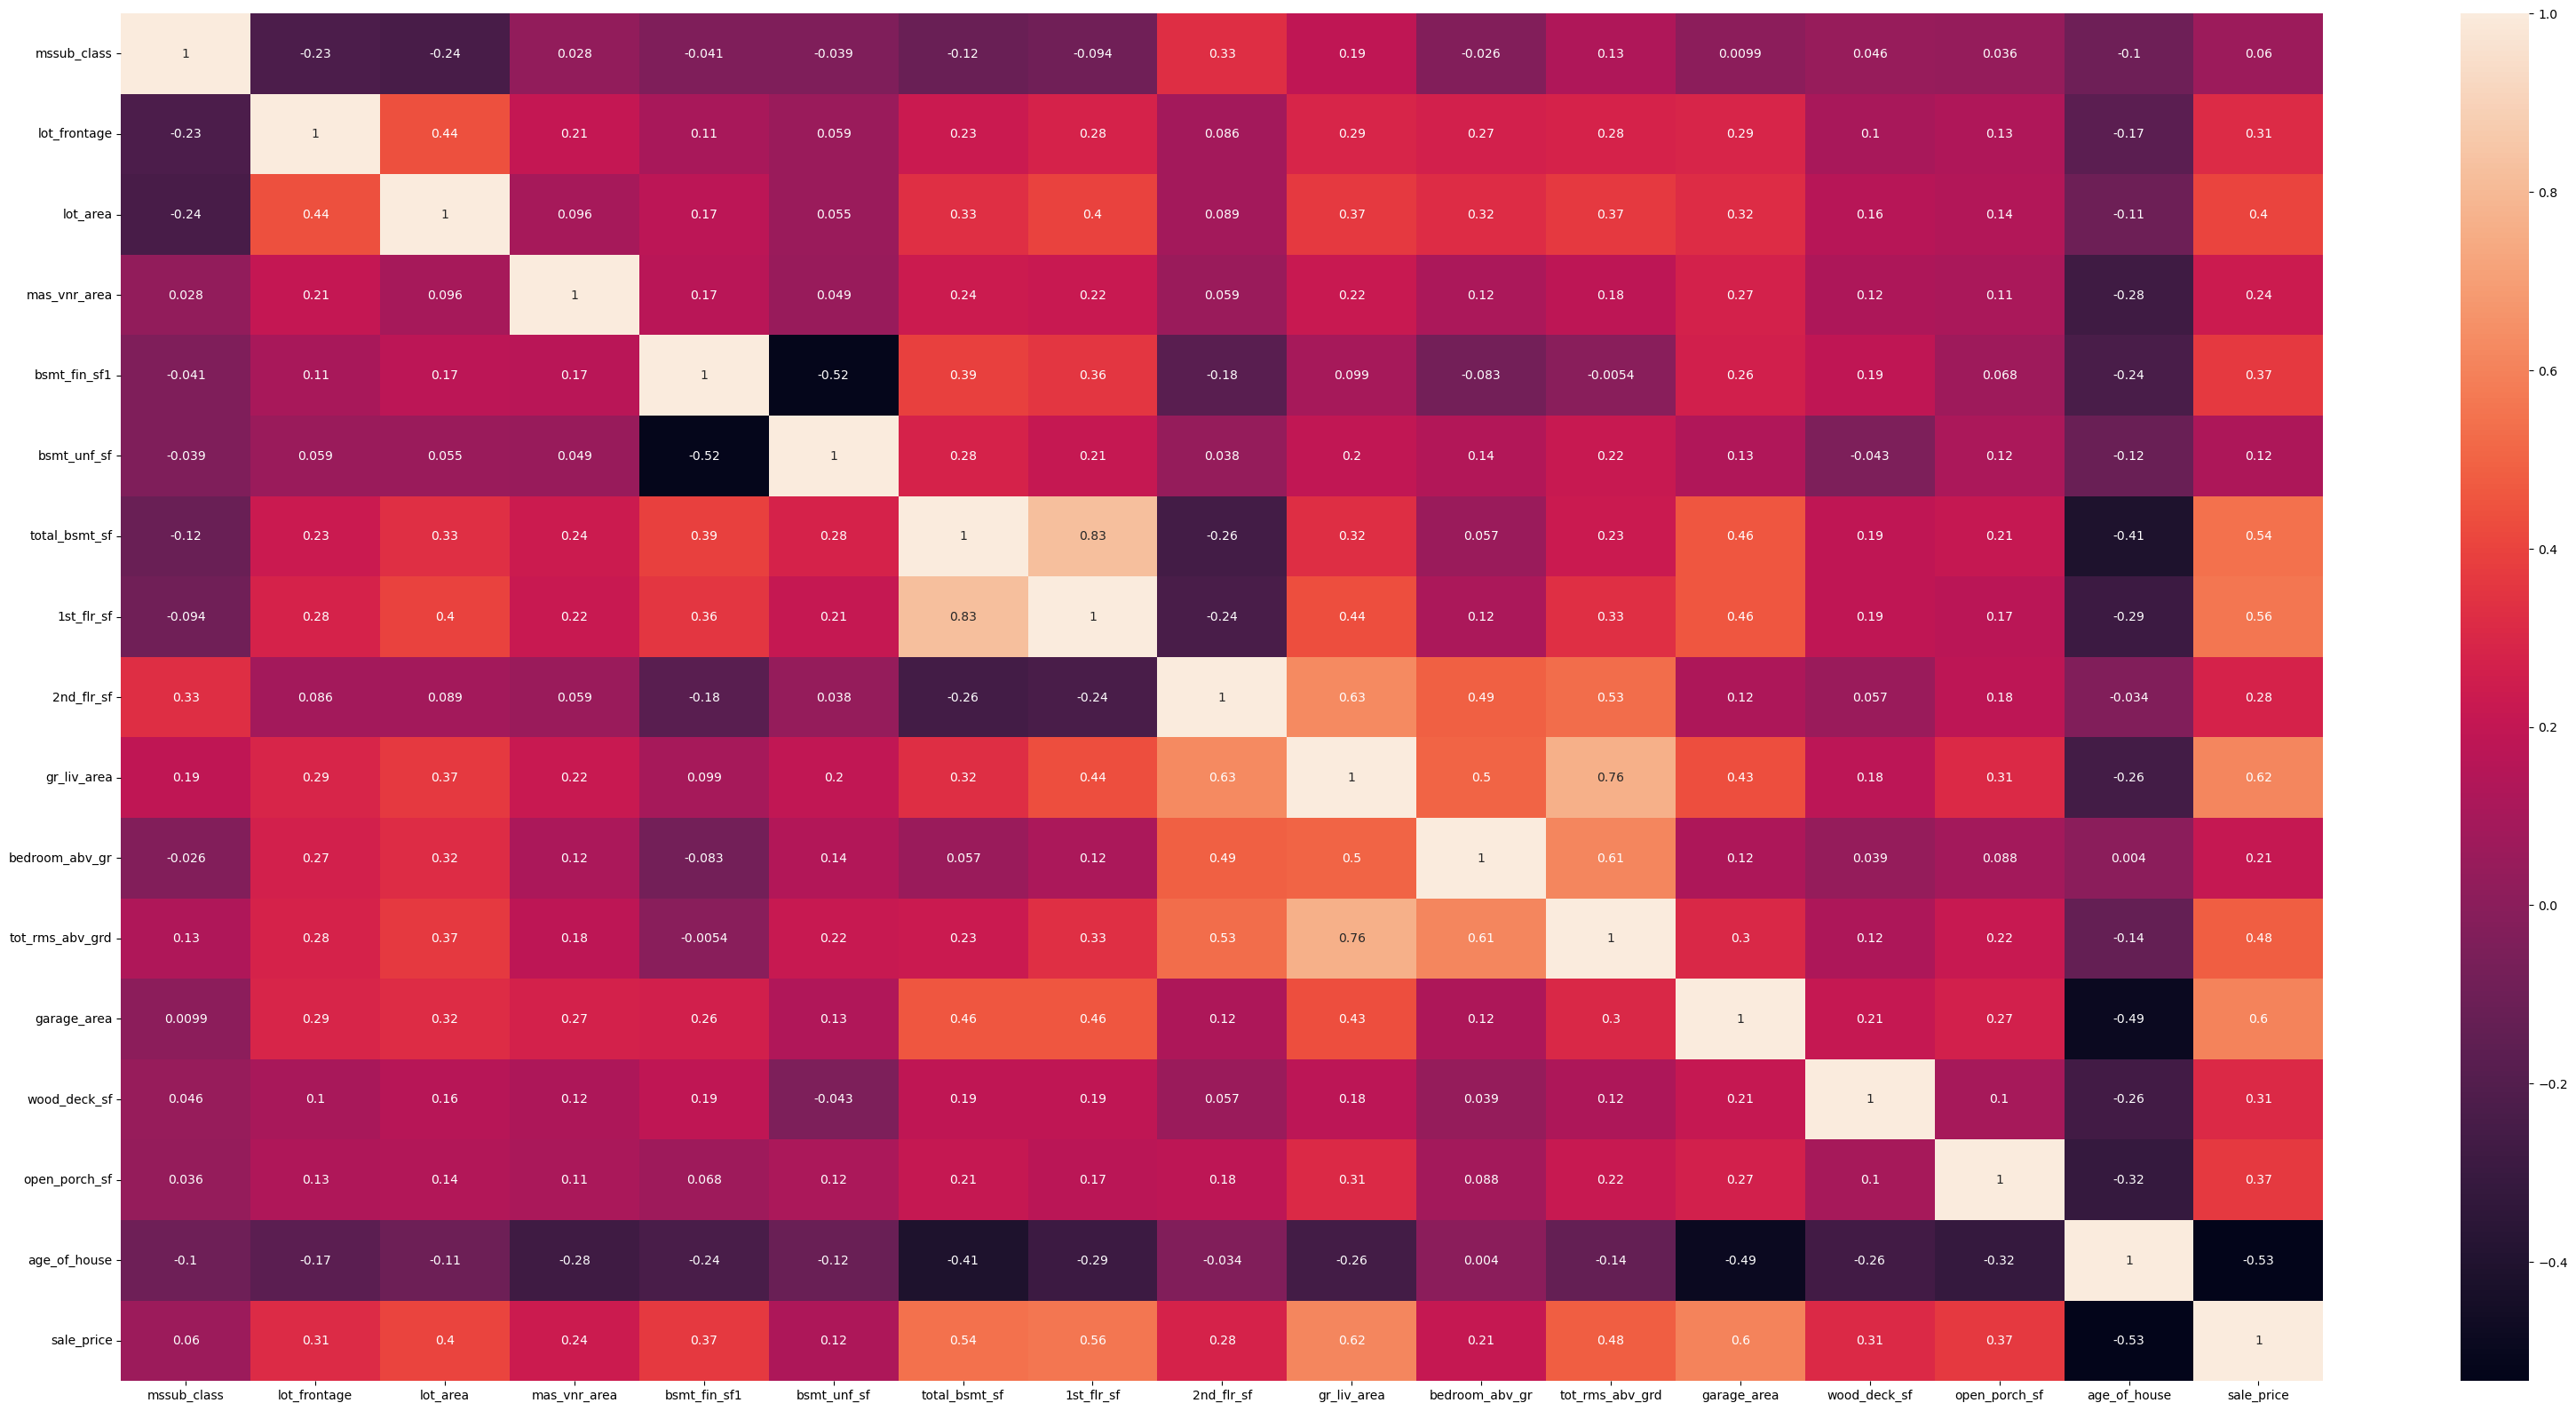

In [740]:
plt.figure(figsize=(40,20))
sns.heatmap(housing_data[num_var+["sale_price"]].corr(),annot=True)
plt.show()

# Pre-processing Steps

In [441]:
## Dummy Variable creation

In [854]:
# for categorical columns creating dummies and dropping the first column

cat_var_dummies = pd.get_dummies(housing_data[cat_vars], drop_first = True)

In [822]:
cat_var_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 237 entries, mszoning_FV to kitchen_abv_gr_3
dtypes: uint8(237)
memory usage: 338.0 KB


In [855]:
# merge the dummy variable created
housing_data = pd.concat([housing_data, cat_var_dummies], axis = 1)

In [856]:
# Then dropping the exisiting categorical columns
housing_data = housing_data.drop(cat_vars, axis=1)

In [857]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 254 entries, mssub_class to kitchen_abv_gr_3
dtypes: float32(2), float64(14), int32(1), uint8(237)
memory usage: 514.8 KB


## Splitting the Data into Training and Testing Sets

In [858]:
X=housing_data.drop(["sale_price"],axis=1)
y=housing_data["sale_price"]

In [859]:
X.columns = X.columns.astype(str)

In [860]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [861]:
X_train.shape

(1168, 253)

## Rescaling the Features 

In [862]:
# Scaling using Min-Max

from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()

X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head(10)


# for i in num_var:
#     X_train[i]=(X_train[i]-X_train[i].mean())/X_train[i].std()



,mssub_class,lot_frontage,lot_area,mas_vnr_area,bsmt_fin_sf1,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,...,bsmt_half_bath_1,bsmt_half_bath_2,full_bath_1,full_bath_2,full_bath_3,half_bath_1,half_bath_2,kitchen_abv_gr_1,kitchen_abv_gr_2,kitchen_abv_gr_3
133,0.0,0.507333,0.331397,0.331707,0.568761,0.155952,0.598660,0.523810,0.000000,0.374346,...,0,0,0,1,0,0,0,1,0,0
290,0.4,0.507333,0.872682,0.000000,0.000000,0.642262,0.501803,0.400794,0.462046,0.646161,...,0,0,0,1,0,1,0,1,0,0
24,0.0,0.507333,0.417491,0.000000,0.106395,0.121429,0.492014,0.390023,0.000000,0.271379,...,0,0,1,0,0,0,0,1,0,0
1093,0.0,0.520000,0.478307,0.404878,0.374080,0.120833,0.391036,0.469388,0.000000,0.332461,...,0,0,1,0,0,1,0,1,0,0
1288,1.0,0.106667,0.257911,0.000000,0.655348,0.204167,0.719217,0.729592,0.000000,0.532723,...,0,0,0,1,0,0,0,1,0,0
374,0.4,0.440000,0.414648,0.000000,0.000000,0.504167,0.382277,0.269274,0.594609,0.650087,...,0,0,0,1,0,1,0,1,0,0
562,0.1,0.413333,0.767367,0.000000,0.164120,0.420238,0.459042,0.353741,0.000000,0.243455,...,0,0,1,0,0,0,0,1,0,0
529,0.0,0.507333,0.493665,0.252891,0.689870,0.485714,0.994333,0.405329,0.000000,0.906195,...,0,0,0,0,1,0,0,0,1,0
1359,0.0,0.507333,0.942274,0.160976,0.818902,0.317262,0.965997,0.911565,0.000000,0.672775,...,0,0,0,1,0,0,0,1,0,0
447,0.4,0.507333,0.600927,0.000000,0.000000,0.553571,0.425039,0.331066,0.511551,0.631763,...,0,0,0,1,0,1,0,1,0,0


In [863]:
X_test[num_var] = scaler.transform(X_test[num_var])
X_test.head(10)

,mssub_class,lot_frontage,lot_area,mas_vnr_area,bsmt_fin_sf1,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,...,bsmt_half_bath_1,bsmt_half_bath_2,full_bath_1,full_bath_2,full_bath_3,half_bath_1,half_bath_2,kitchen_abv_gr_1,kitchen_abv_gr_2,kitchen_abv_gr_3
1436,0.0,0.373333,0.464091,0.000000,0.348613,0.147619,0.391036,0.278912,0.000000,0.185864,...,0,0,1,0,0,0,0,1,0,0
57,0.4,0.760000,0.627565,0.000000,0.000000,0.511905,0.388975,0.276644,0.473047,0.559337,...,0,0,0,1,0,1,0,1,0,0
780,0.0,0.413333,0.394561,0.092683,0.000000,0.736310,0.583205,0.499433,0.000000,0.355585,...,0,0,0,1,0,0,0,1,0,0
382,0.4,0.626667,0.479234,0.000000,0.000000,0.558929,0.429675,0.321429,0.471947,0.592932,...,0,0,0,1,0,1,0,1,0,0
1170,0.6,0.586667,0.518480,0.000000,0.295416,0.341667,0.510562,0.422902,0.000000,0.296684,...,0,0,1,0,0,0,0,1,0,0
726,0.0,0.507333,0.493665,0.634146,0.457272,0.042857,0.399279,0.741497,0.000000,0.541885,...,0,0,0,1,0,0,0,1,0,0
258,0.4,0.640000,0.676391,0.419512,0.204301,0.358333,0.442040,0.335034,0.455996,0.590750,...,0,0,0,1,0,1,0,1,0,0
888,0.0,0.840000,0.888381,0.000000,0.198642,0.620833,0.456723,0.405329,0.000000,0.776178,...,0,0,0,1,0,0,0,1,0,0
532,0.0,0.373333,0.352843,0.000000,0.000000,0.000000,0.456723,0.257937,0.000000,0.169721,...,0,0,1,0,0,0,0,1,0,0
1055,0.0,0.960000,0.610012,0.390244,0.364460,0.326786,0.560536,0.652494,0.000000,0.473386,...,1,0,0,1,0,0,0,1,0,0


In [751]:
# for i in num_var:
#     X_test[i]=(X_test[i]-X_test[i].mean())/X_test[i].std()
# X_test.head(10)

,mssub_class,lot_frontage,lot_area,mas_vnr_area,bsmt_fin_sf1,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,...,bsmt_half_bath_1,bsmt_half_bath_2,full_bath_1,full_bath_2,full_bath_3,half_bath_1,half_bath_2,kitchen_abv_gr_1,kitchen_abv_gr_2,kitchen_abv_gr_3
1436,-0.973312,-0.715281,-0.074860,-0.619521,0.479129,-0.807171,-0.545623,-0.781217,-0.801685,-1.309039,...,0,0,1,0,0,0,0,1,0,0
57,0.471197,1.388649,0.737901,-0.619521,-0.974462,0.802515,-0.557330,-0.792781,1.167843,0.623367,...,0,0,0,1,0,1,0,1,0,0
780,-0.973312,-0.497633,-0.420553,-0.261664,-0.974462,1.794102,0.546024,0.343401,-0.801685,-0.430878,...,0,0,0,1,0,0,0,1,0,0
382,0.471197,0.663156,0.000424,-0.619521,-0.974462,1.010301,-0.326123,-0.564388,1.163262,0.797193,...,0,0,0,1,0,1,0,1,0,0
1170,1.193452,0.445508,0.195548,-0.619521,0.257315,0.050276,0.133364,-0.046890,-0.801685,-0.735638,...,0,0,1,0,0,0,0,1,0,0
726,-0.973312,0.013837,0.072174,1.828974,0.932197,-1.270088,-0.498796,1.577880,-0.801685,0.533068,...,0,0,0,1,0,0,0,1,0,0
258,0.471197,0.735705,0.980654,1.000253,-0.122601,0.123921,-0.255883,-0.495003,1.096848,0.785906,...,0,0,0,1,0,1,0,1,0,0
888,-0.973312,1.823945,2.034632,-0.619521,-0.146198,1.283842,-0.172473,-0.136513,-0.801685,1.745336,...,0,0,0,1,0,0,0,1,0,0
532,-0.973312,-0.715281,-0.627968,-0.619521,-0.974462,-1.459462,-0.172473,-0.888186,-0.801685,-1.392566,...,0,0,1,0,0,0,0,1,0,0
1055,-0.973312,2.476889,0.650633,0.887245,0.545202,-0.015479,0.417251,1.123985,-0.801685,0.178643,...,1,0,0,1,0,0,0,1,0,0


# Modelling

# Linear Regression 

In [864]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [865]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

5458791592655869.0
[-3.28190796e+03 -1.39278123e+03  2.28252141e+04 -1.04034362e+04
  2.18095024e+04  7.62370668e+03  1.69674321e+03  5.02033641e+04
  1.94912845e+04  2.70801759e+04  6.44481781e+02  1.94911169e+04
  1.48067148e+04  4.67102744e+03  7.61501281e+03 -2.72533604e+04
  4.23488862e+04  3.99945255e+04  3.09139008e+04  3.32811873e+04
  1.83693654e+04  1.22466250e+03  2.29302830e+04 -1.07401662e+03
 -6.33396694e+03  1.79549796e+03  5.02909764e+03 -4.37430355e+04
  5.19702372e+03 -1.56296048e+04 -2.48589505e+04 -2.97684036e+03
  5.72085651e+03  1.96665020e+04 -1.46791467e+04 -5.25539390e+03
  5.59216954e+03  6.63448543e+03  2.79849312e+03  2.75270366e+04
 -7.51637158e+03  7.98791725e+02 -4.36531003e+03 -1.61797613e+04
 -4.58264483e+03 -1.27919552e+03  1.67856857e+04 -4.39757517e+03
  4.39706844e+04  1.34962847e+04 -4.91440358e+03  4.16053799e+03
  1.22938981e+03  6.12834458e+03  1.01673876e+02  2.85206193e+04
  8.75684812e+02  1.01125355e+04  2.10314427e+03  9.81354167e+03
  6.90

In [866]:
from sklearn.metrics import r2_score, mean_squared_error

In [867]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9209963899679233
-1.2846433075051209e+19
579103965602.0
2.411653597569011e+31
495808189.72773975
8.259087662907573e+28


In [514]:
## As we can see above , R2 for Linear Regression for Training is 92.0 % however for testing data it's simply not able to 
## to explain the data . This would be case of overfitting .

 # Let's try to use Ridge and Lasso .

## Ridge

In [902]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [903]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 9.0}


In [904]:
#Fitting Ridge model for alpha = 9 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.53455149e+03  3.58444709e+03  2.03515196e+04 -6.56929073e+03
  2.62208686e+04  6.79063332e+03  1.31639181e+04  3.24427001e+04
  7.89525813e+03  2.79845342e+04  3.91737030e+03  2.70318751e+04
  1.71137876e+04  6.55248226e+03  1.07463680e+04 -1.04891142e+04
  8.88950757e+03  6.54695755e+03  2.61954880e+03  2.06900902e+03
  2.44720513e+03  2.15328984e+03  4.94345522e+02 -1.51565659e+03
  4.06561625e+03  3.37483080e+03  8.25777966e+03 -3.58837365e+03
  6.24394332e+03 -1.14384282e+04 -6.15289821e+03 -2.20099539e+03
  6.67766218e+03  3.36537138e+03 -2.91662096e+03 -2.68535462e+03
  1.15265646e+03  3.10613590e+03 -2.30703648e+03  1.67117370e+04
 -1.71820363e+04 -5.00780022e+03 -1.04621071e+04 -9.25477074e+03
 -9.29148799e+03 -7.47870567e+03  2.64194962e+03 -5.72838545e+03
  3.46598946e+04  1.58220219e+04 -8.45770807e+03 -4.07785345e+02
 -6.09676708e+03  4.61821122e+02  4.00812625e+03  2.09045489e+04
 -3.69171163e+03  4.13398386e+03 -2.40483729e+03  8.47044073e+03
  3.52296434e+03 -1.43357

In [905]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8951172430725232
0.8887555060162073
768800570446.2354
208838657826.96124
658219666.4779413
715200882.9690454


In [ ]:
 # For Ridge we can see R2 for training data is 89.4% and for testing data is 88.3% . 
    # Very close to training . So, Ridge here seems to be working fine .
# Let's try out lasso also.

## Lasso

In [906]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [874]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [907]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [876]:
lasso.coef_

array([-4.84814691e+03,  0.00000000e+00,  2.27621403e+04, -4.14432192e+03,
        2.90294134e+04,  2.65456817e+03,  3.98405429e+03,  4.27950588e+04,
        6.77170651e+03,  3.92406137e+04,  0.00000000e+00,  2.50232353e+04,
        1.50617174e+04,  4.20295079e+03,  9.38882078e+03, -1.09605904e+04,
        5.20425342e+03,  0.00000000e+00,  0.00000000e+00, -4.79157639e+02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.68784220e+03,
        0.00000000e+00,  8.36522611e+02,  4.12327932e+03, -0.00000000e+00,
        5.73820195e+03, -9.15981521e+03, -0.00000000e+00, -1.00928429e+03,
        3.13897117e+03,  9.66336477e+01, -0.00000000e+00, -0.00000000e+00,
        2.07146045e+03,  7.27455035e+03,  0.00000000e+00,  1.89419083e+04,
       -1.36609496e+04, -0.00000000e+00, -8.27550180e+03, -1.11072757e+04,
       -4.23433297e+03, -2.96724688e+03,  0.00000000e+00, -1.35181475e+03,
        4.14944373e+04,  1.42630021e+04, -6.21474988e+03,  0.00000000e+00,
       -2.07463788e+03,  

In [908]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8995730691008068
0.8911549390588495
736138942427.4147
204334215780.20206
630255943.859088
699774711.5760344


In [ ]:
 # For Lasso we can see R2 for training data is 89.96% and for testing data is 89.1% . 
    # very Close to training . So, Lasso here seems to be working best .

In [878]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.209964e-01,8.951172e-01,8.995731e-01
1,R2 Score (Test),-1.284643e+19,8.887555e-01,8.911549e-01
2,RSS (Train),5.791040e+11,7.688006e+11,7.361389e+11
3,RSS (Test),2.411654e+31,2.088387e+11,2.043342e+11
4,MSE (Train),2.226675e+04,2.565579e+04,2.510490e+04
5,MSE (Test),2.873863e+14,2.674324e+04,2.645326e+04


,Linear,Ridge,Lasso
mssub_class,-3281.907961,-3534.551486,-4848.146909
lot_frontage,-1392.781226,3584.447095,0.000000
lot_area,22825.214138,20351.519556,22762.140297
mas_vnr_area,-10403.436153,-6569.290727,-4144.321920
bsmt_fin_sf1,21809.502380,26220.868597,29029.413402
bsmt_unf_sf,7623.706680,6790.633321,2654.568174
total_bsmt_sf,1696.743214,13163.918096,3984.054286
1st_flr_sf,50203.364137,32442.700062,42795.058807
2nd_flr_sf,19491.284548,7895.258131,6771.706515
gr_liv_area,27080.175905,27984.534233,39240.613726


## Model Evaluation

The r2_score of lasso is slightly higher than ridge for the test dataset

In [ ]:
# Ridge Prediction

In [882]:
ridge_pred = ridge.predict(X_test)

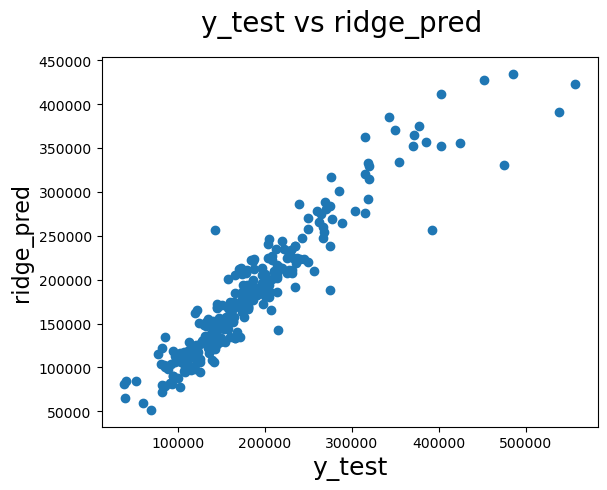

In [883]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

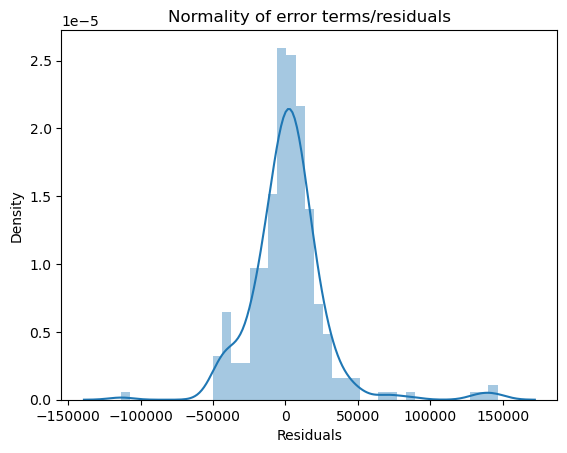

In [884]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [ ]:
# Lasso Predictions

In [885]:
lasso_pred = lasso.predict(X_test)

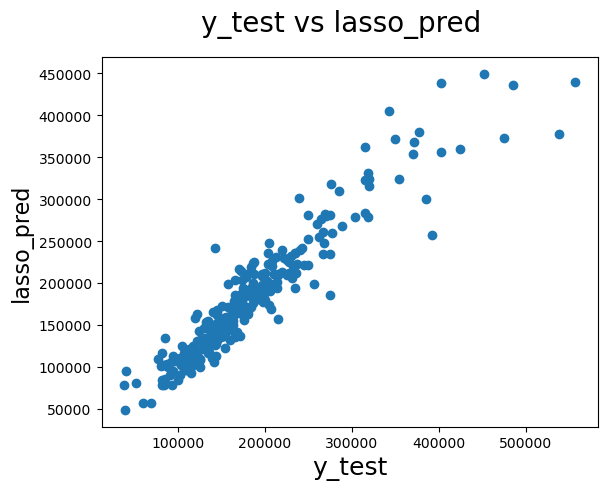

In [886]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()


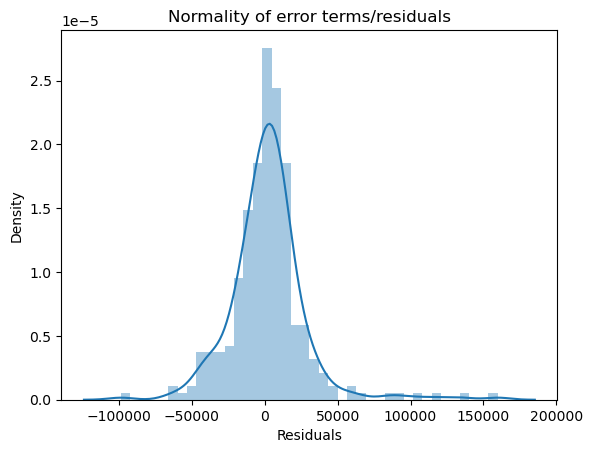

In [887]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [888]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
mssub_class,-3281.907961,-3534.551486,-4848.146909
lot_frontage,-1392.781226,3584.447095,0.000000
lot_area,22825.214138,20351.519556,22762.140297
mas_vnr_area,-10403.436153,-6569.290727,-4144.321920
bsmt_fin_sf1,21809.502380,26220.868597,29029.413402
bsmt_unf_sf,7623.706680,6790.633321,2654.568174
total_bsmt_sf,1696.743214,13163.918096,3984.054286
1st_flr_sf,50203.364137,32442.700062,42795.058807
2nd_flr_sf,19491.284548,7895.258131,6771.706515
gr_liv_area,27080.175905,27984.534233,39240.613726


In [893]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', 78809.751),
 ('mssub_class', -4848.147),
 ('lot_frontage', 0.0),
 ('lot_area', 22762.14),
 ('mas_vnr_area', -4144.322),
 ('bsmt_fin_sf1', 29029.413),
 ('bsmt_unf_sf', 2654.568),
 ('total_bsmt_sf', 3984.054),
 ('1st_flr_sf', 42795.059),
 ('2nd_flr_sf', 6771.707),
 ('gr_liv_area', 39240.614),
 ('bedroom_abv_gr', 0.0),
 ('tot_rms_abv_grd', 25023.235),
 ('garage_area', 15061.717),
 ('wood_deck_sf', 4202.951),
 ('open_porch_sf', 9388.821),
 ('age_of_house', -10960.59),
 ('mszoning_FV', 5204.253),
 ('mszoning_RH', 0.0),
 ('mszoning_RL', 0.0),
 ('mszoning_RM', -479.158),
 ('street_Pave', 0.0),
 ('lot_shape_IR2', 0.0),
 ('lot_shape_IR3', -0.0),
 ('lot_shape_Reg', -1687.842),
 ('land_contour_HLS', 0.0),
 ('land_contour_Low', 836.523),
 ('land_contour_Lvl', 4123.279),
 ('utilities_NoSeWa', -0.0),
 ('lot_config_CulDSac', 5738.202),
 ('lot_config_FR2', -9159.815),
 ('lot_config_FR3', -0.0),
 ('lot_config_Inside', -1009.284),
 ('land_slope_Mod', 3138.971),
 ('land_slope_Sev', 96.634),

In [894]:
mod = list(zip(cols, model_parameters))

In [895]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
93,overall_qual_10,103635.002
0,constant,78809.751
92,overall_qual_9,63785.788
248,full_bath_3,58608.180
113,roof_matl_WdShngl,51705.949
8,1st_flr_sf,42795.059
49,neighborhood_NoRidge,41494.437
10,gr_liv_area,39240.614
5,bsmt_fin_sf1,29029.413
12,tot_rms_abv_grd,25023.235


Q1-Which variables are significant in predicting the price of a house?

    Ans : The below variables are significant in predicting the prices of a house
    1. overall_qual_10
    2. overall_qual_9
    3. full_bath_3
    4. roof_matl_WdShngl
    5. 1st_flr_sf	
    6.neighborhood_NoRidge	
    7.gr_liv_area
    8.bsmt_fin_sf1
    9.tot_rms_abv_grd
    10. overall_qual_8
    11. lot_area

Q2 -How well those variables describe the price of a house


#Metric                      Ridge                          Lasso 
#R2(Train)                  0.8951172                         0.8995731
#R2(Test)                   0.8887555                         0.891154


The r2_score of lasso is slightly higher than ridge for the test dataset. We can use lasso model for the predictions as it also does feature selections . 


In [896]:
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
93,overall_qual_10,103635.002
0,constant,78809.751
92,overall_qual_9,63785.788
248,full_bath_3,58608.180
113,roof_matl_WdShngl,51705.949
8,1st_flr_sf,42795.059
49,neighborhood_NoRidge,41494.437
10,gr_liv_area,39240.614
5,bsmt_fin_sf1,29029.413
12,tot_rms_abv_grd,25023.235


# Problem Statement -Part 2

# Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal value of alpha for ridge and lasso regression

Ridge Alpha 9

lasso Alpha 100

In [912]:
# Changing the alpha for ridge from alpha = 9 to alpha = 18

#Fitting Ridge model for alpha = 9 and printing coefficients which have been penalised
alpha = 18
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8847713615420342
0.8811984259075518
844636864756.3575
223025521468.16208
723148000.6475664
763786032.4252126


For alpha = 9 

R2(Train)     0.8951172                      
R2(Test)       0.8887555   


for alpha = 18

 R2(Train)      0.8847
R2(Test)        0.8811

Both training and test R2 score got decreased but a very very small change. Not significant

In [913]:
# Lasso alpha from 100 to 200

alpha = 200

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 


# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.8837527882732236
0.8827874180144964
852103103564.7473
220042515594.9878
729540328.3944755
753570258.8869445


For alpha = 100
R2(Train)                           0.8995731
R2(Test)                            0.891154


for alpha = 200
R2(Train)                          0.88375
R2(Test)                           0.88278


Both R2 training and test score got decreased

In [914]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge2,Ridge,Lasso,Lasso2
mssub_class,-3138.910216,-3534.551486,-4848.146909,-3102.454648
lot_frontage,5475.035385,3584.447095,0.000000,0.000000
lot_area,18585.341279,20351.519556,22762.140297,21135.253768
mas_vnr_area,-5886.873814,-6569.290727,-4144.321920,-1746.105123
bsmt_fin_sf1,22673.087965,26220.868597,29029.413402,29154.912790
bsmt_unf_sf,6195.756657,6790.633321,2654.568174,0.000000
total_bsmt_sf,14434.211799,13163.918096,3984.054286,5150.985020
1st_flr_sf,27897.824541,32442.700062,42795.058807,36807.154576
2nd_flr_sf,8058.722767,7895.258131,6771.706515,0.000000
gr_liv_area,24827.807458,27984.534233,39240.613726,46265.665763


Predictors are same but the coefficent of these predictor has changed

# Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Ans :
The r2_score of lasso is slightly higher than lasso for the test dataset so we will choose lasso regression
to solve this problem . Also lasso provides features selections as well . Better to use lasso with respect to that and to make the model more robust.

# Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important 
predictor variables now?

In [916]:
X_train.columns

Index(['mssub_class', 'lot_frontage', 'lot_area', 'mas_vnr_area',
       'bsmt_fin_sf1', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'gr_liv_area',
       ...
       'bsmt_half_bath_1', 'bsmt_half_bath_2', 'full_bath_1', 'full_bath_2',
       'full_bath_3', 'half_bath_1', 'half_bath_2', 'kitchen_abv_gr_1',
       'kitchen_abv_gr_2', 'kitchen_abv_gr_3'],
      dtype='object', length=253)

In [918]:
X_train1 = X_train.drop(['overall_qual_10', 'overall_qual_9', 'full_bath_3', 'roof_matl_WdShngl', '1st_flr_sf'], axis=1)
X_test1 = X_test.drop(['overall_qual_10', 'overall_qual_9', 'full_bath_3', 'roof_matl_WdShngl', '1st_flr_sf'], axis=1)

In [919]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train1, y_train) 
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train1, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso3.predict(X_train1)
y_pred_test = lasso3.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

# lasso model parameters
model_parameters = list(lasso3.coef_ )
model_parameters.insert(0, lasso3.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train1.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.8837098915832098
0.8678723343188257
852417540377.0416
248042517652.0287
729809537.9940425
849460676.8905092


,Variable,Coeff
0,constant,192036.208
48,neighborhood_NoRidge,49840.829
9,gr_liv_area,45395.315
11,tot_rms_abv_grd,38860.147
5,bsmt_fin_sf1,34558.836
55,neighborhood_StoneBr,30657.817
197,fireplaces_2,25410.780
7,total_bsmt_sf,25332.126
3,lot_area,25169.472
160,bsmt_exposure_Gd,21995.695


Now , the 5 most important predictors are :
1. neighborhood_NoRidge
2.gr_liv_area
3. tot_rms_abv_grd
4. bsmt_fin_sf1
5. neighborhood_StoneBr

# Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Ans :
The model should be generalized so that the test accuracy should not be much lesser compared to the training score. 
The model should be accurate for test datasets and so it should be generic in nature .
Too much importance should not given to the outliers so that the accuracy predicted by the model is high. 
To ensure that this should not happen , the outliers analysis needs to be done and only those which are relevant to the dataset need to be retained. 
Those outliers which it does not make sense to keep must be handled or removed from the dataset.

If the model is not robust, It cannot be trusted for predictive analysis.
